# Basic Statistics: Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

This notebook computes descriptive statistics, visualizes distributions, and explores categorical variables for the provided sales dataset.

## 1. Load the dataset

In [1]:
# LOAD DATASET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"/mnt/data/sales_data_with_discounts (3).csv")
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


## 2. Identify numerical and categorical columns

In [2]:
# COLUMN TYPES
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()
print('Numeric columns:', num_cols)
print('Categorical columns:', cat_cols)

Numeric columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
Categorical columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


## 3. Descriptive Analytics for Numerical Columns

In [3]:
# DESCRIPTIVE STATISTICS (mean, median, mode, std)
basic_stats = df[num_cols].agg(['mean','median','std']).T

modes = {}
for c in num_cols:
    m = df[c].mode(dropna=True)
    modes[c] = None if m.empty else m.iloc[0]
modes_df = pd.DataFrame.from_dict(modes, orient='index', columns=['mode'])

stats_full = basic_stats.join(modes_df)
stats_full

,mean,median,std,mode
Volume,5.066667,4.000000,4.231602,3.000000
Avg Price,10453.433333,1450.000000,18079.904840,400.000000
Total Sales Value,33812.835556,5700.000000,50535.074173,24300.000000
Discount Rate (%),15.155242,16.577766,4.220602,5.007822
Discount Amount,3346.499424,988.933733,4509.902963,69.177942
Net Sales Value,30466.336131,4677.788059,46358.656624,326.974801


### Skewness (helps comment on distribution shape)

In [4]:
# SKEWNESS
df[num_cols].skew(numeric_only=True)

Volume               2.731724
Avg Price            1.908873
Total Sales Value    1.534729
Discount Rate (%)   -1.062294
Discount Amount      1.913038
Net Sales Value      1.540822
dtype: float64

## 4. Histograms for Numerical Columns

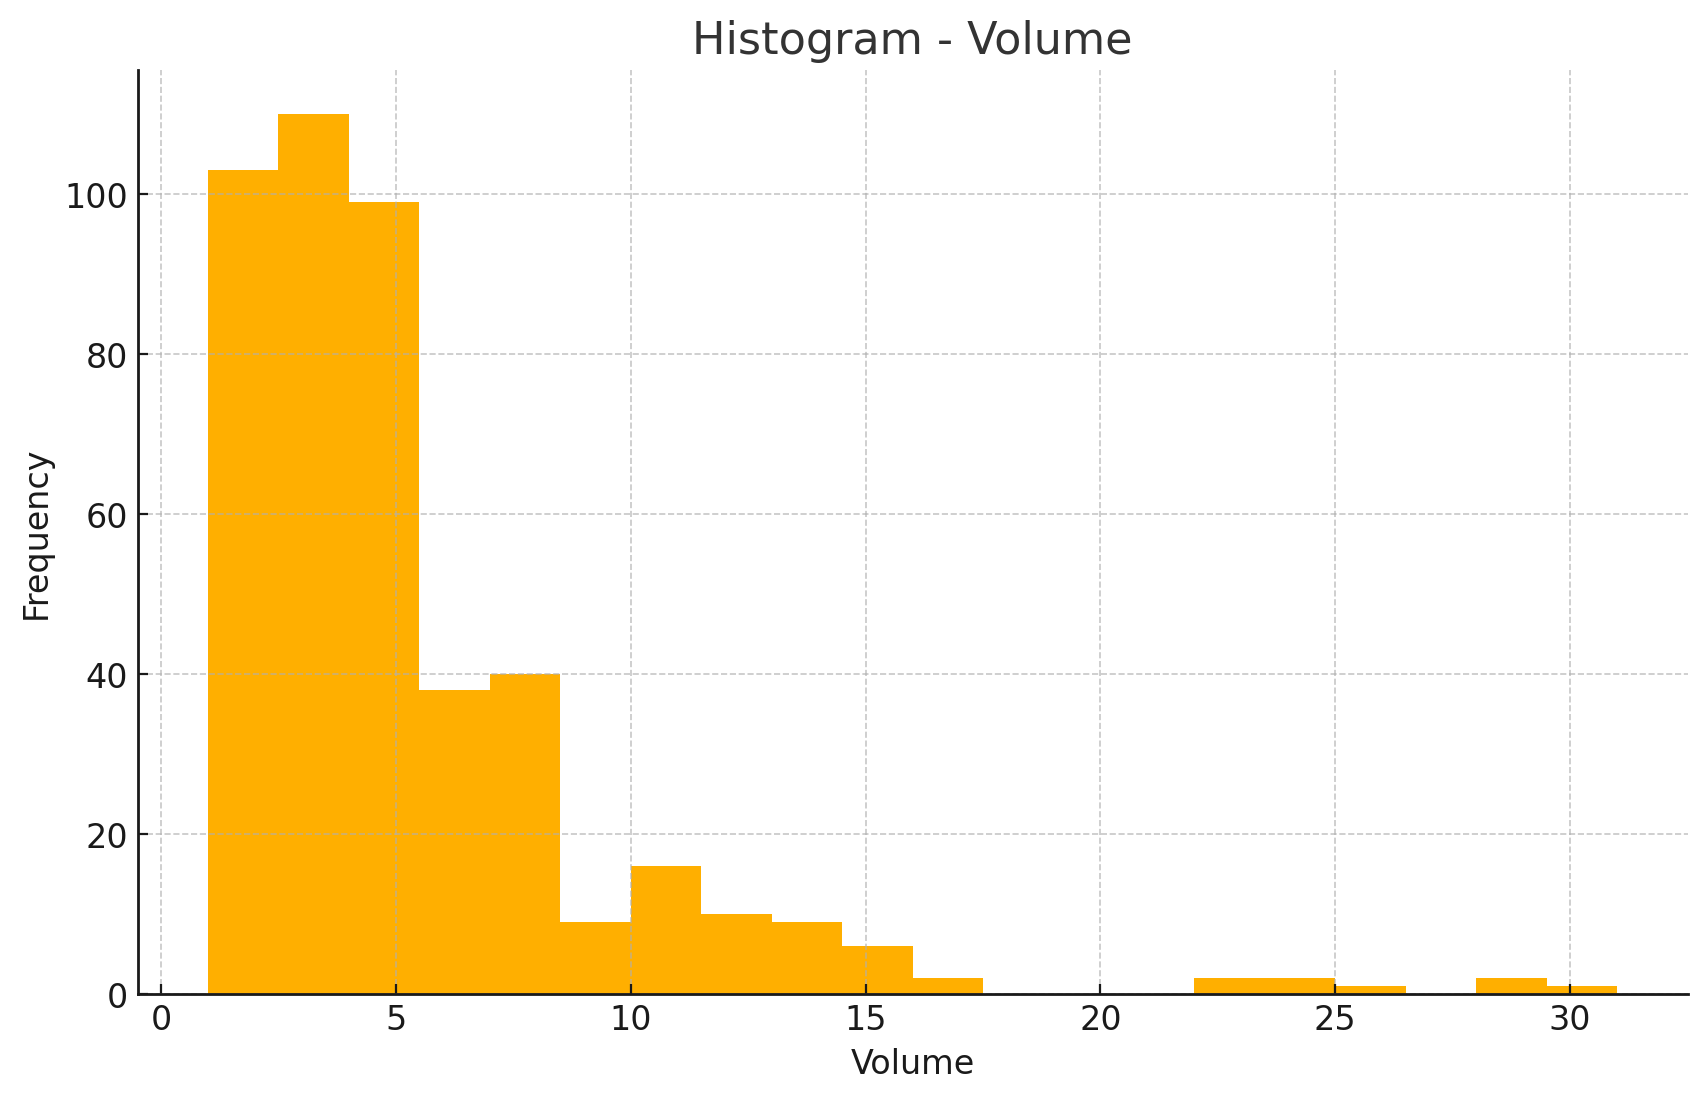

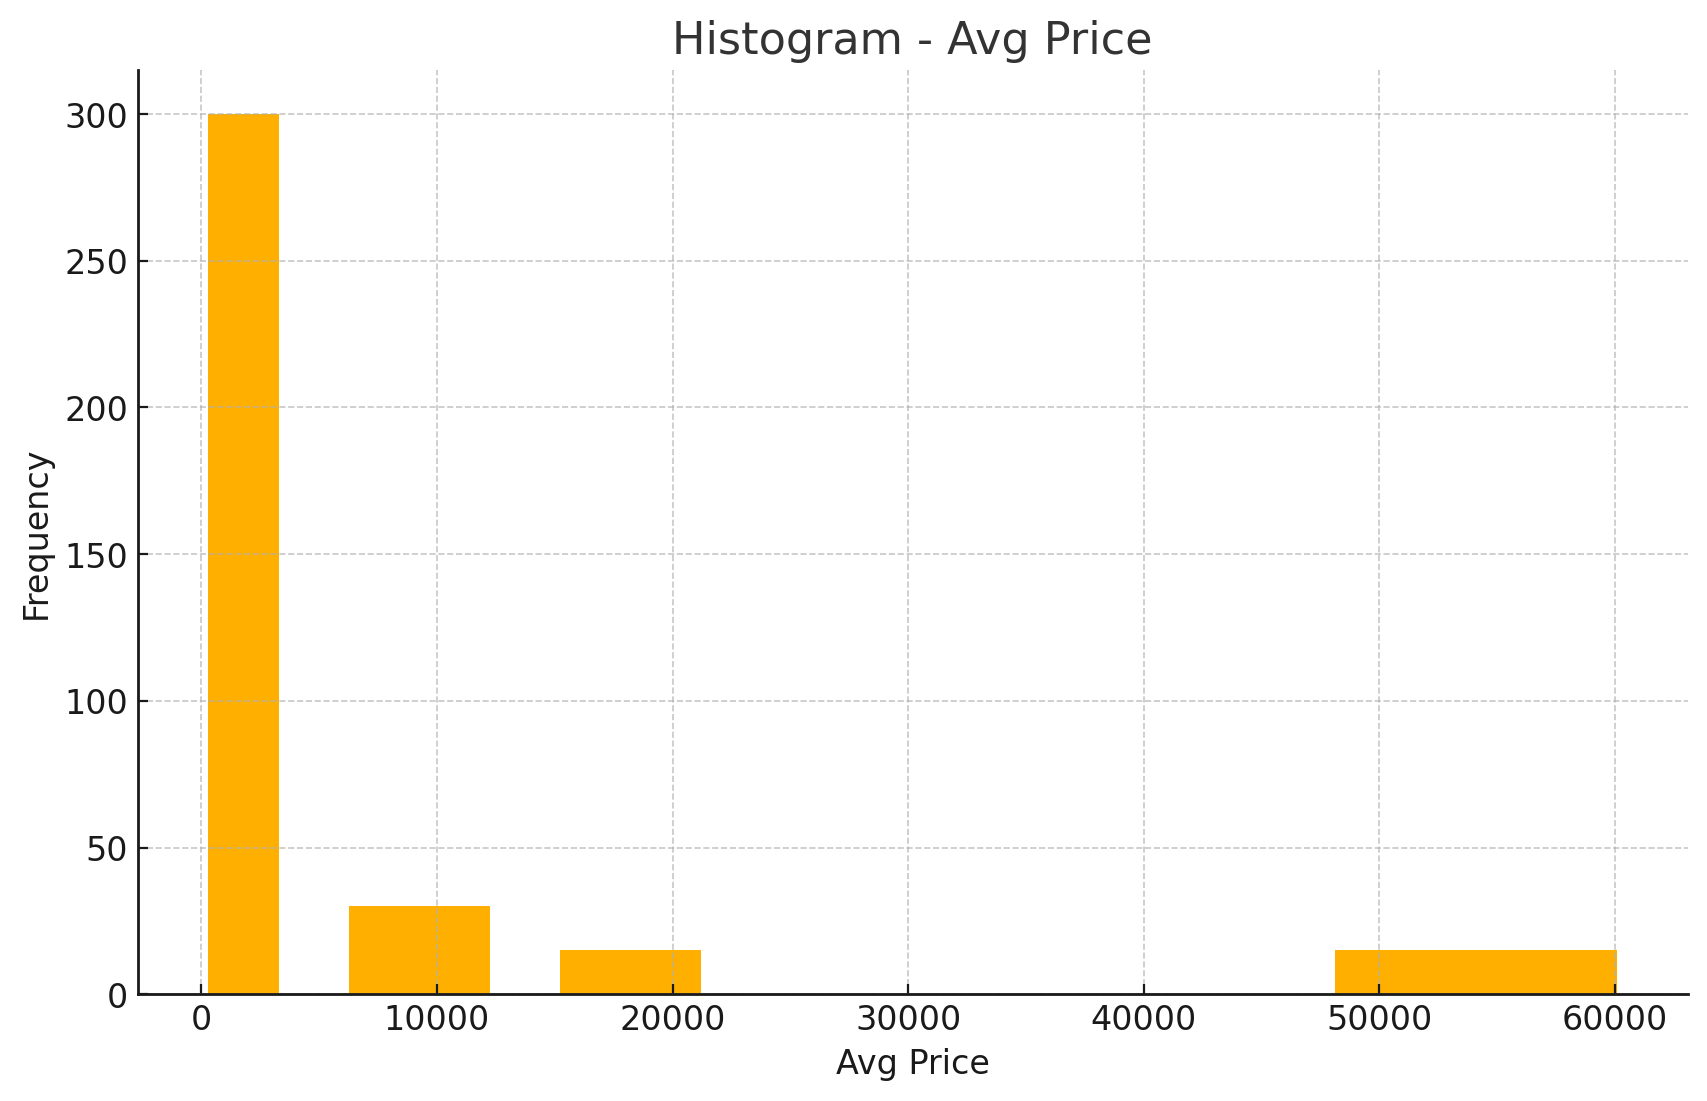

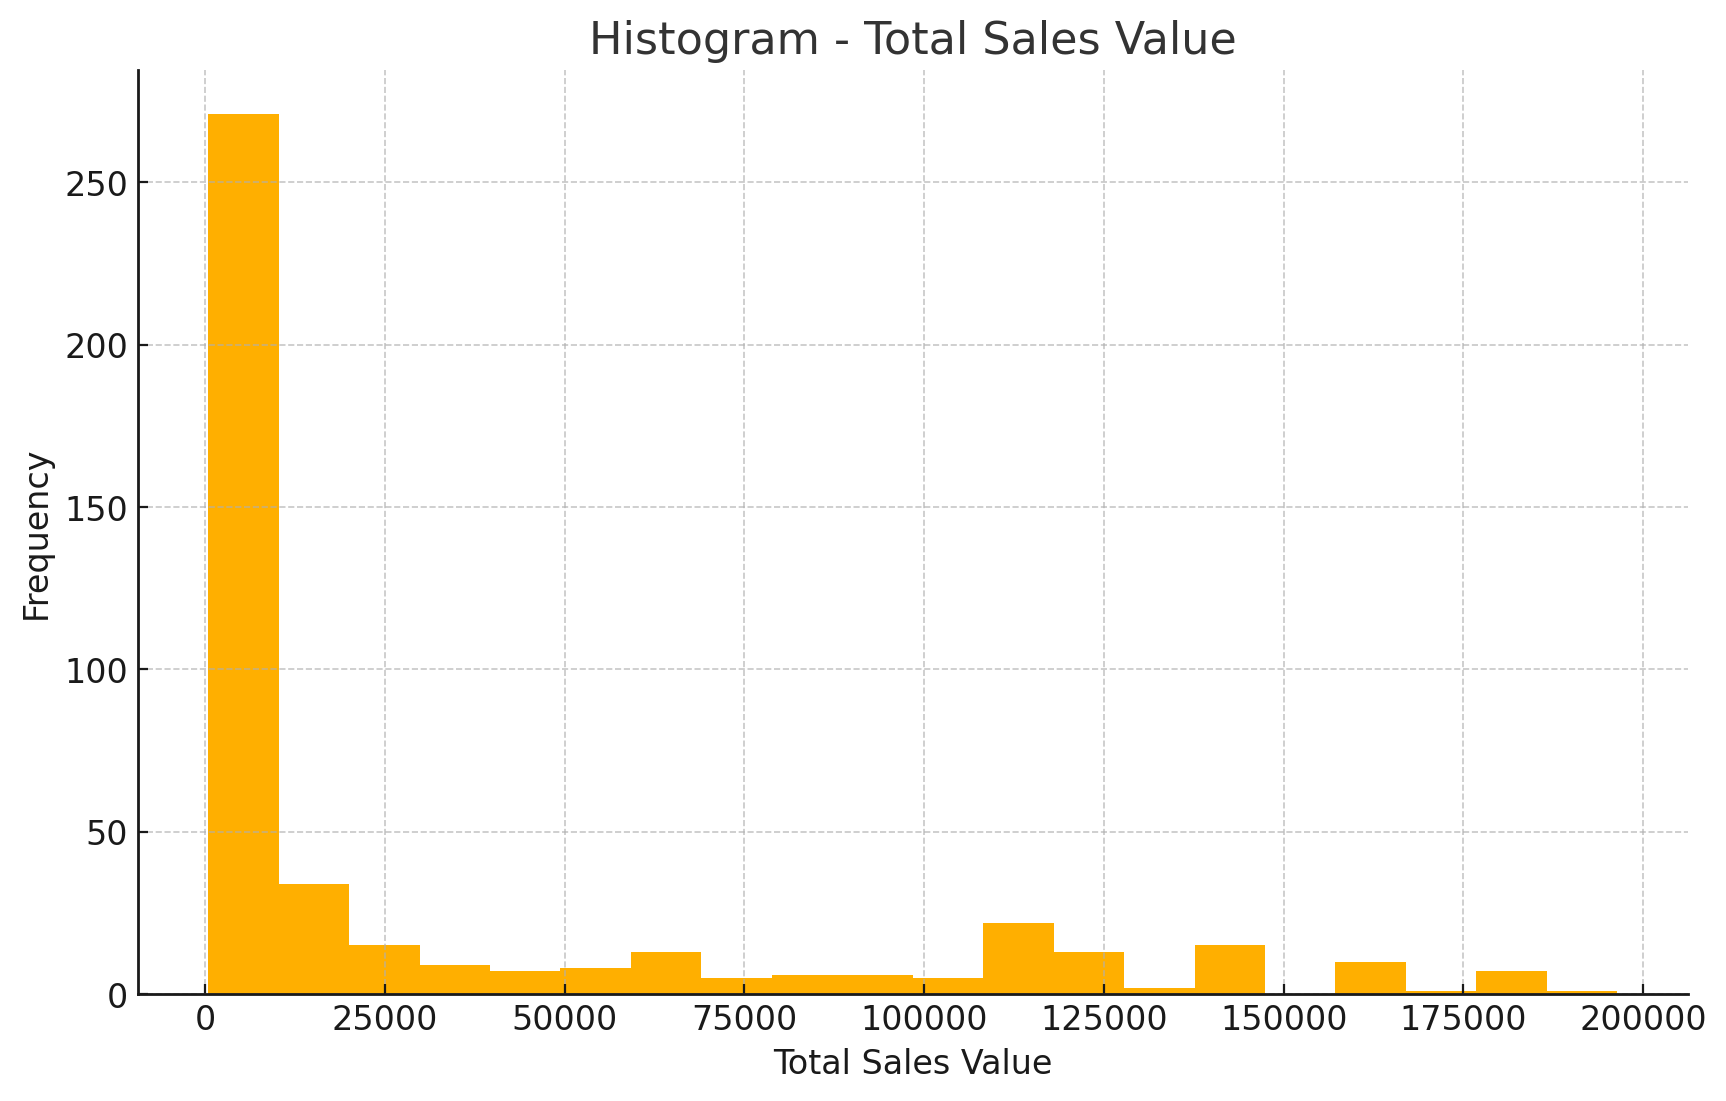

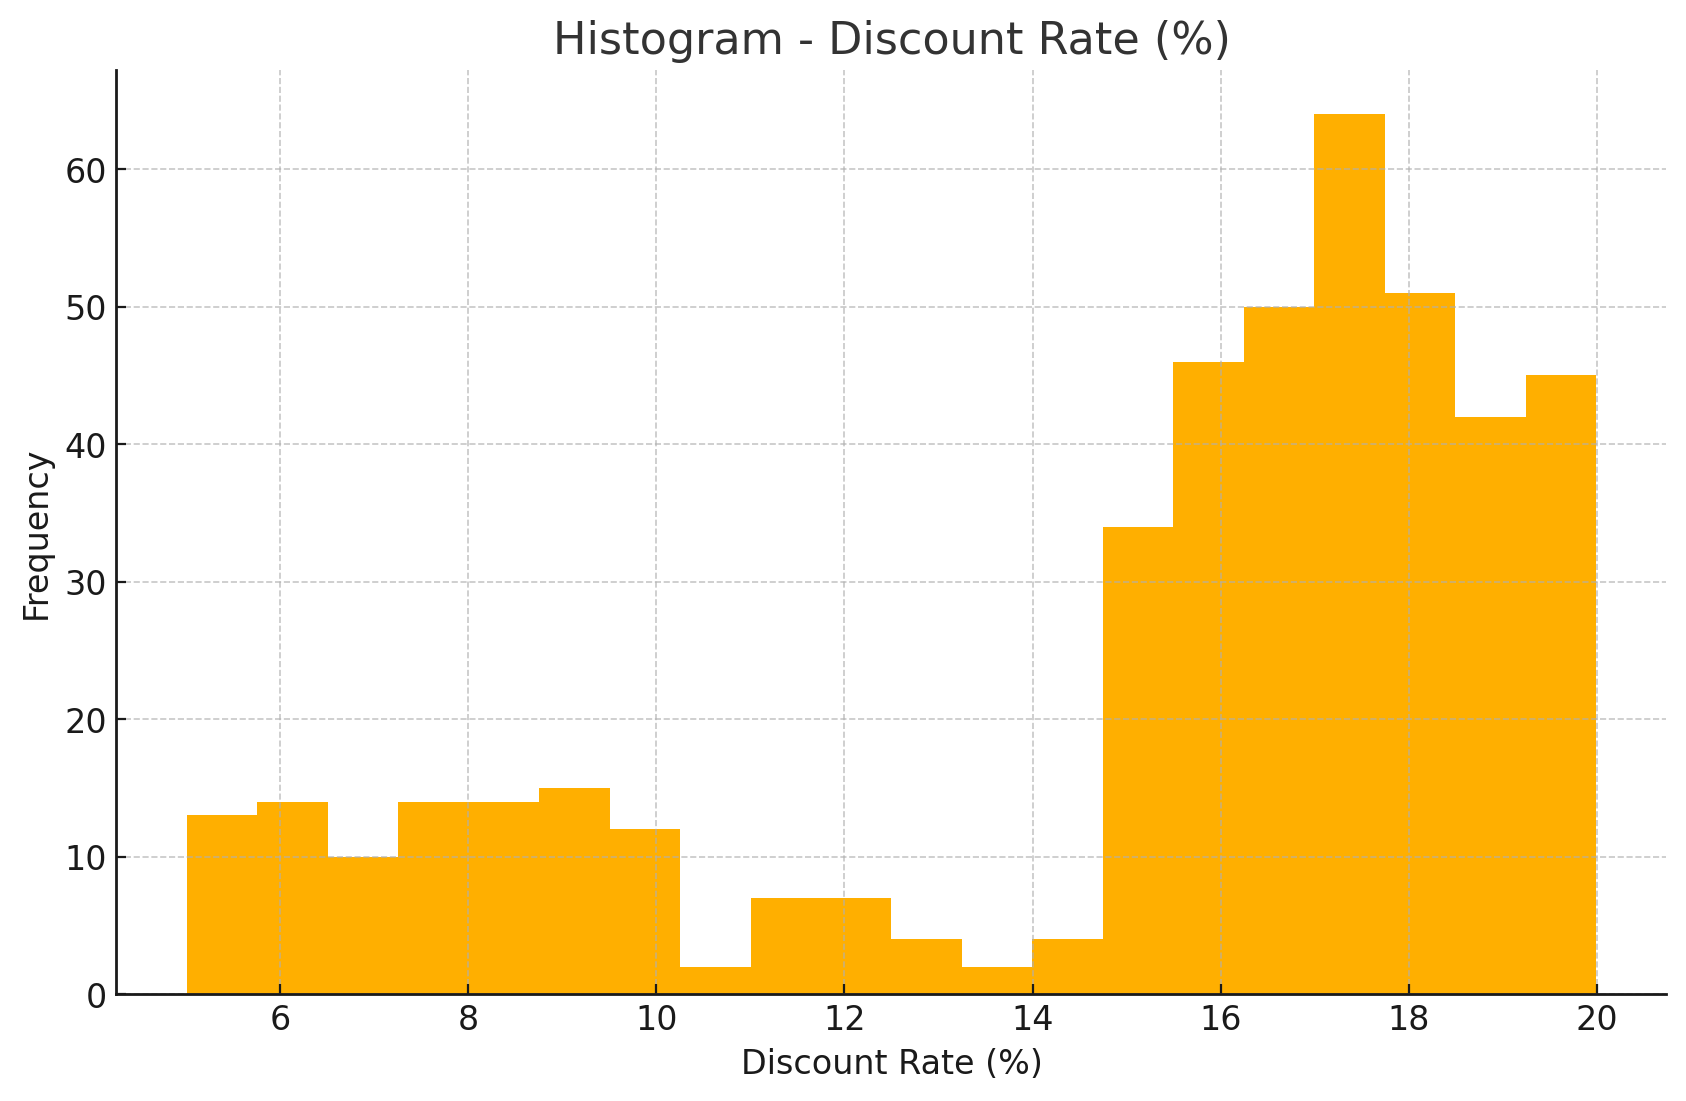

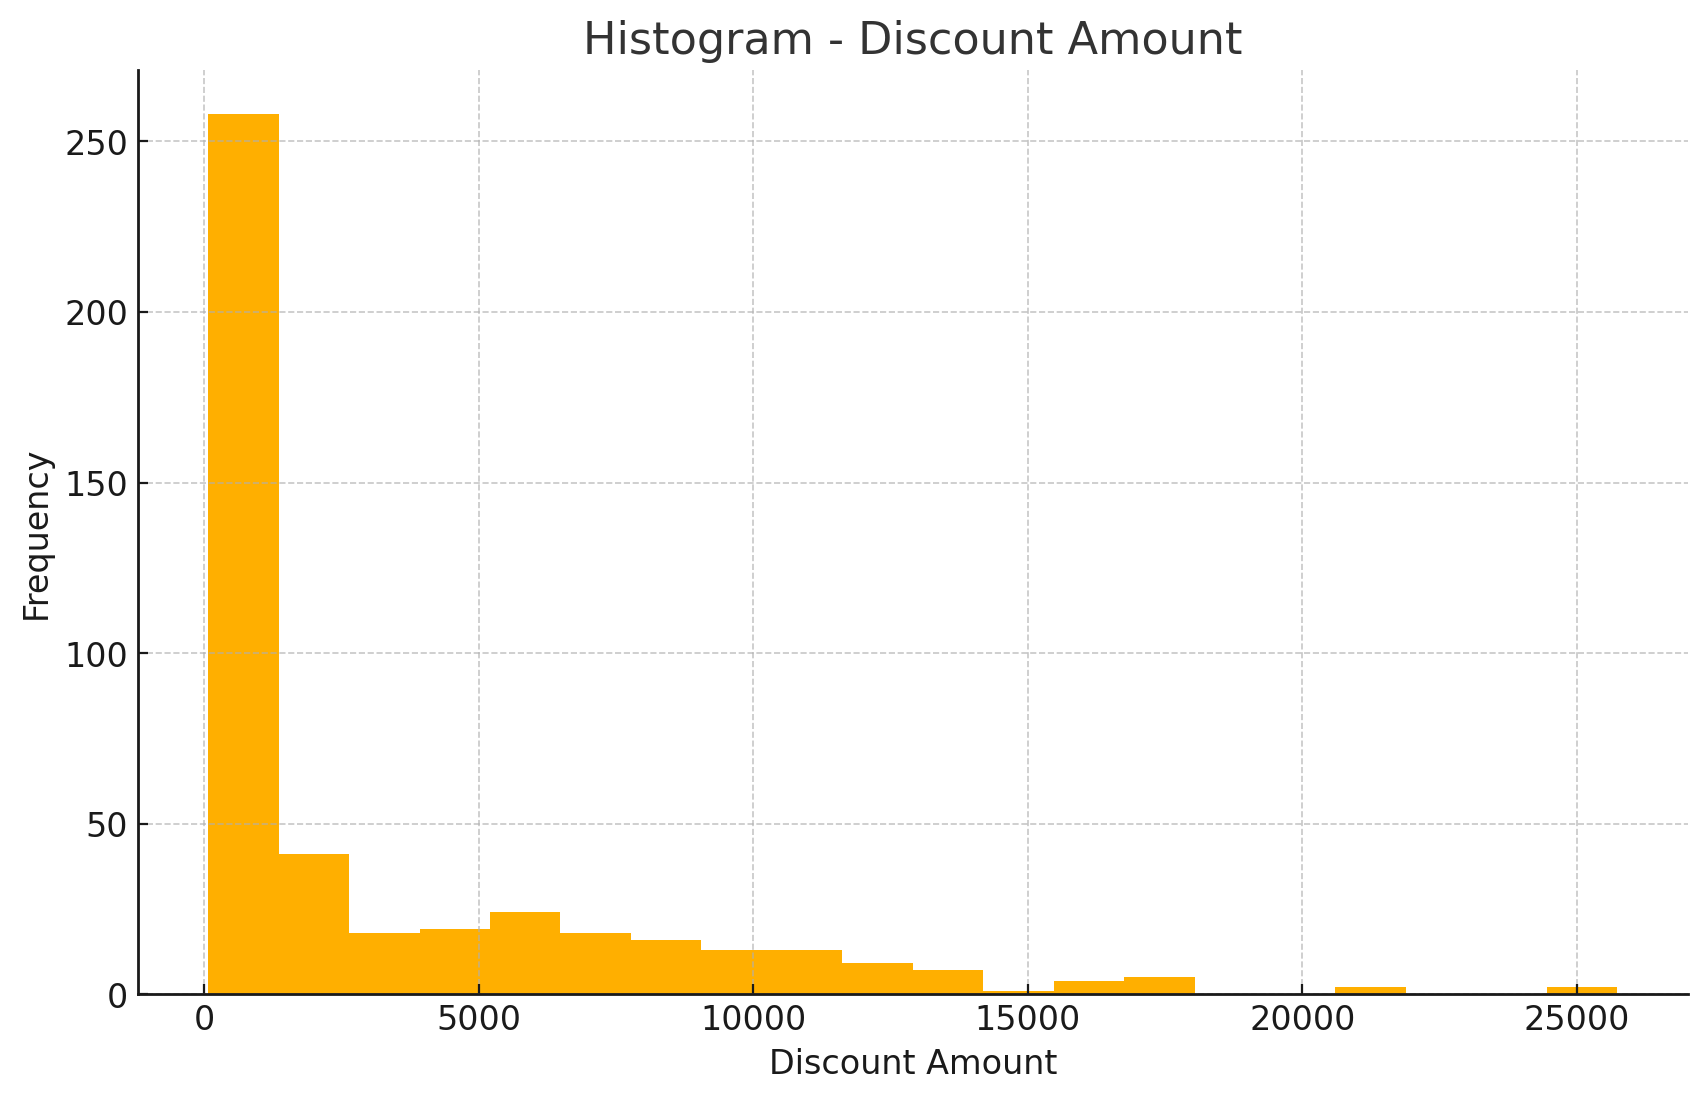

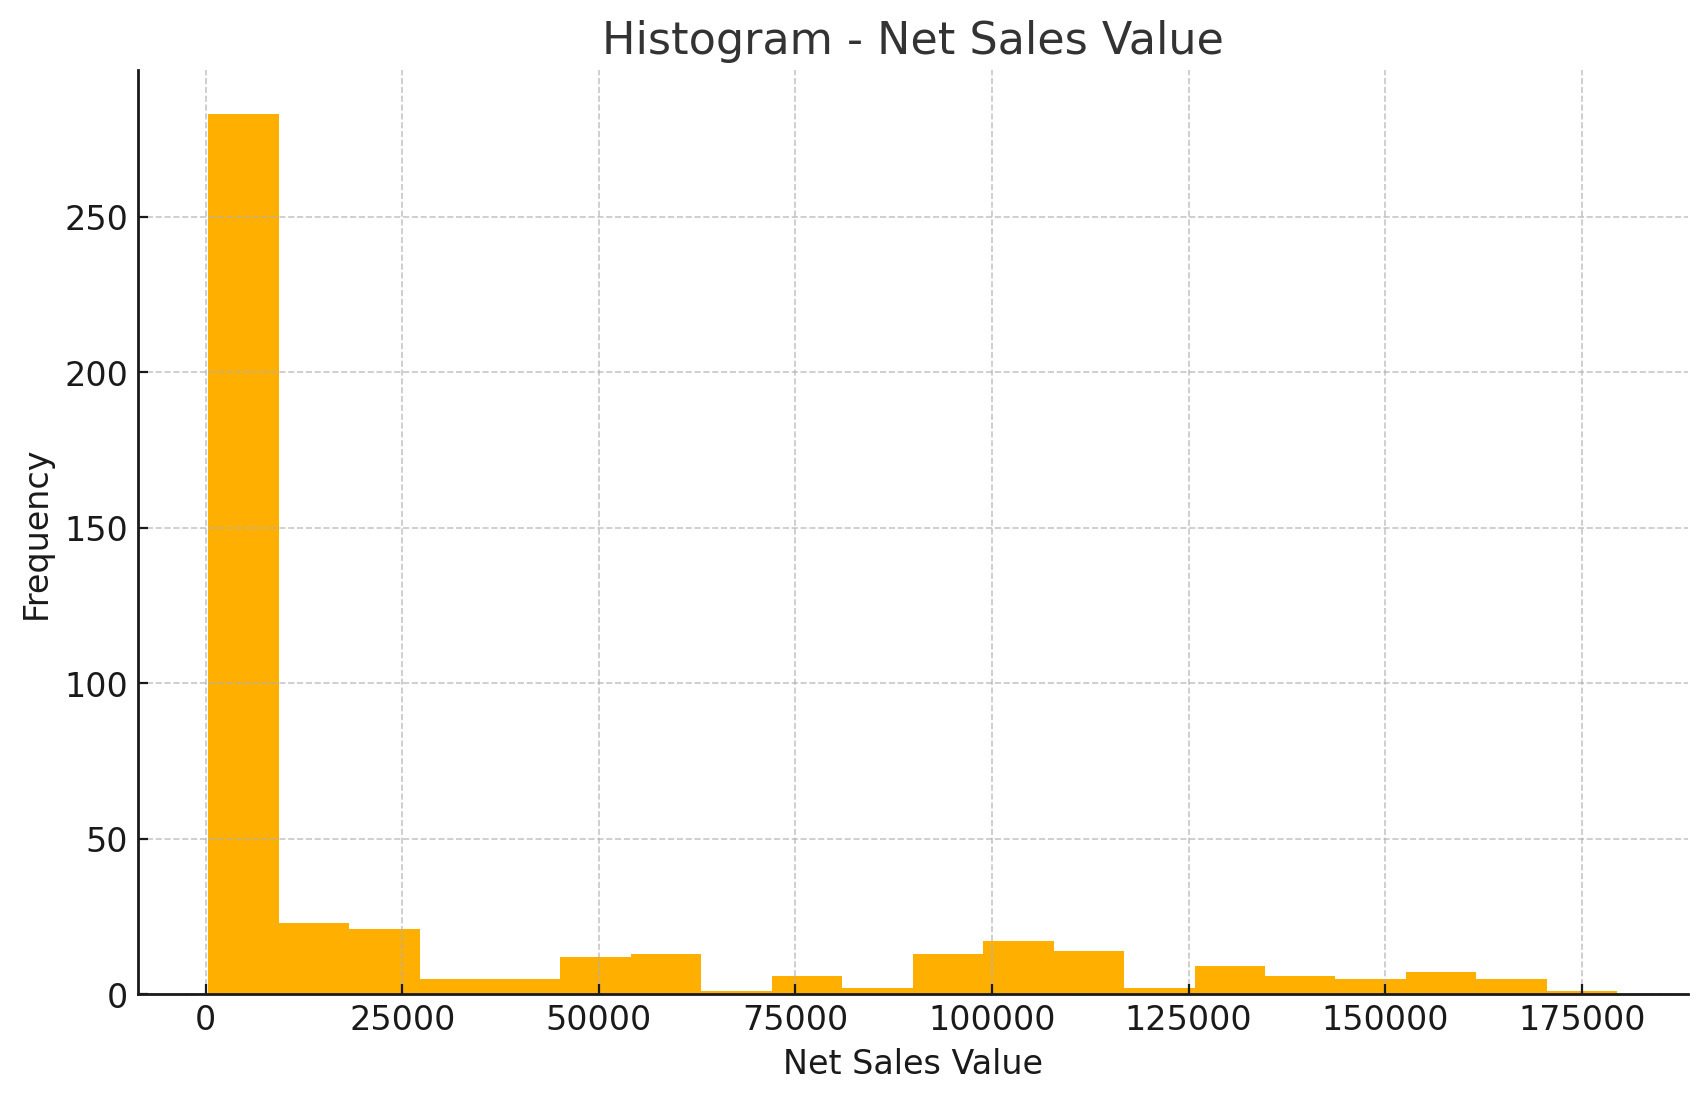

In [5]:
# HISTOGRAMS (one plot per column; matplotlib only, no styles/colors)
for c in num_cols:
    plt.figure()
    plt.hist(df[c].dropna(), bins=20)
    plt.title(f"Histogram - {c}")
    plt.xlabel(c)
    plt.ylabel("Frequency")
    plt.show()

## 5. Box Plots for Numerical Columns

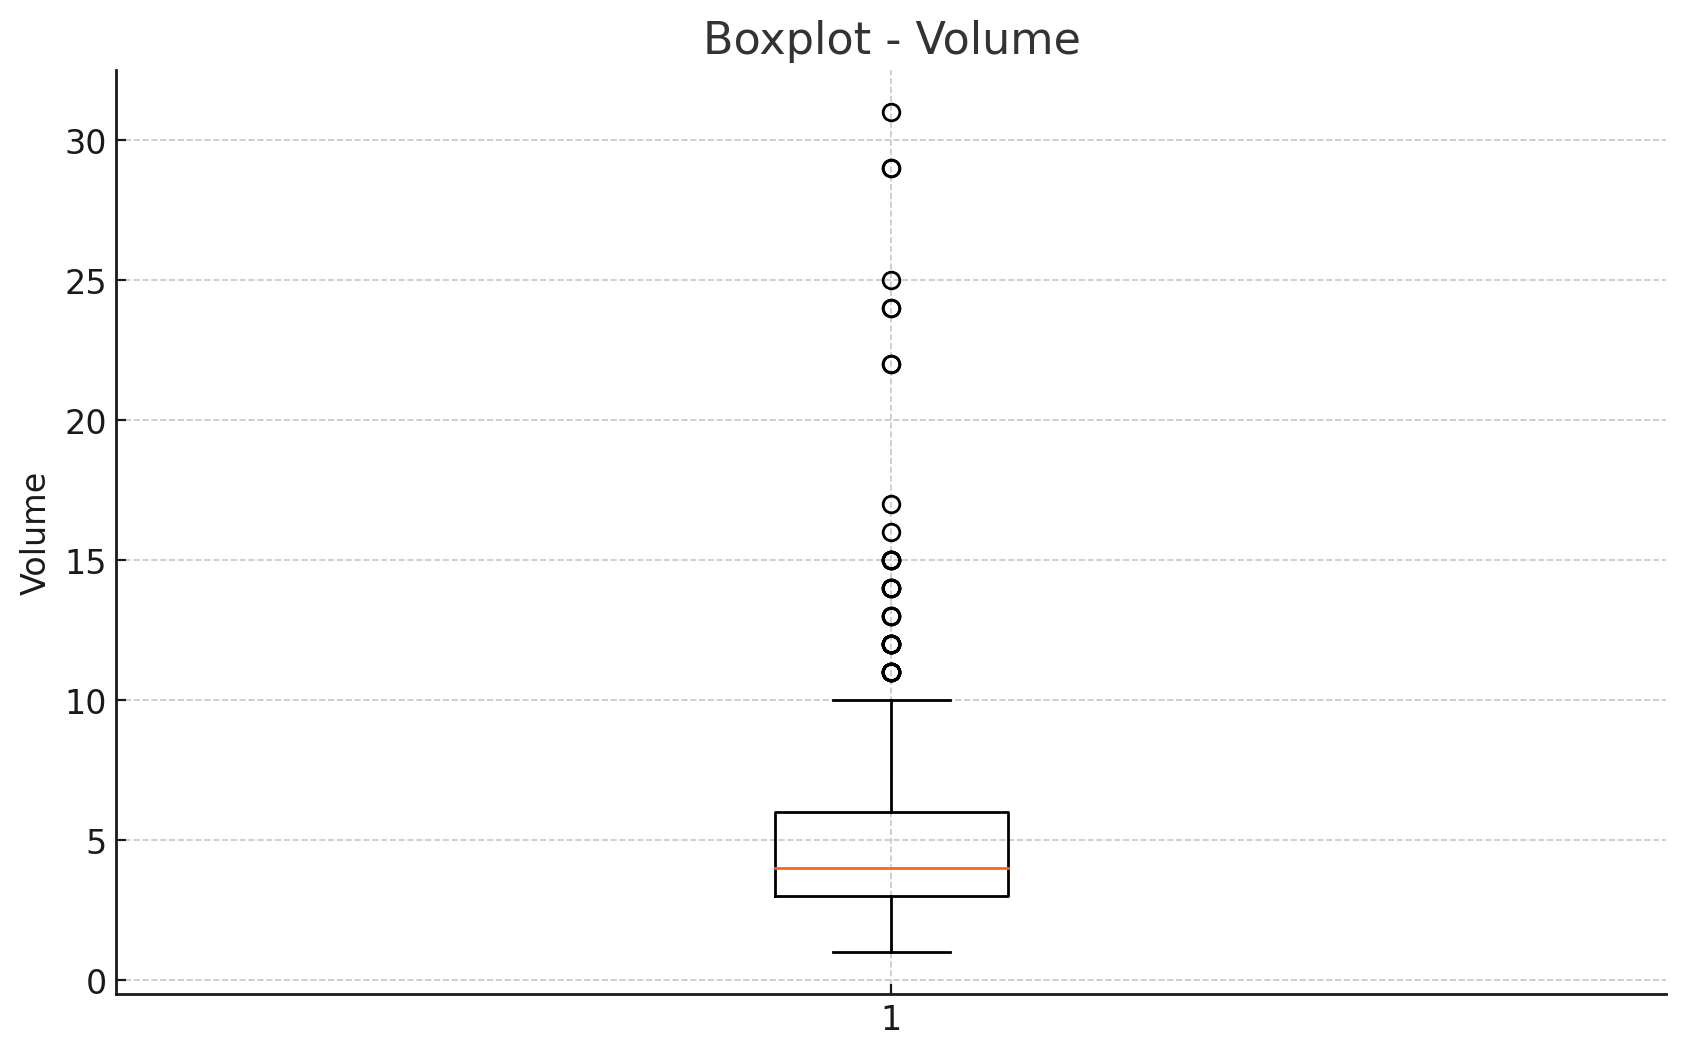

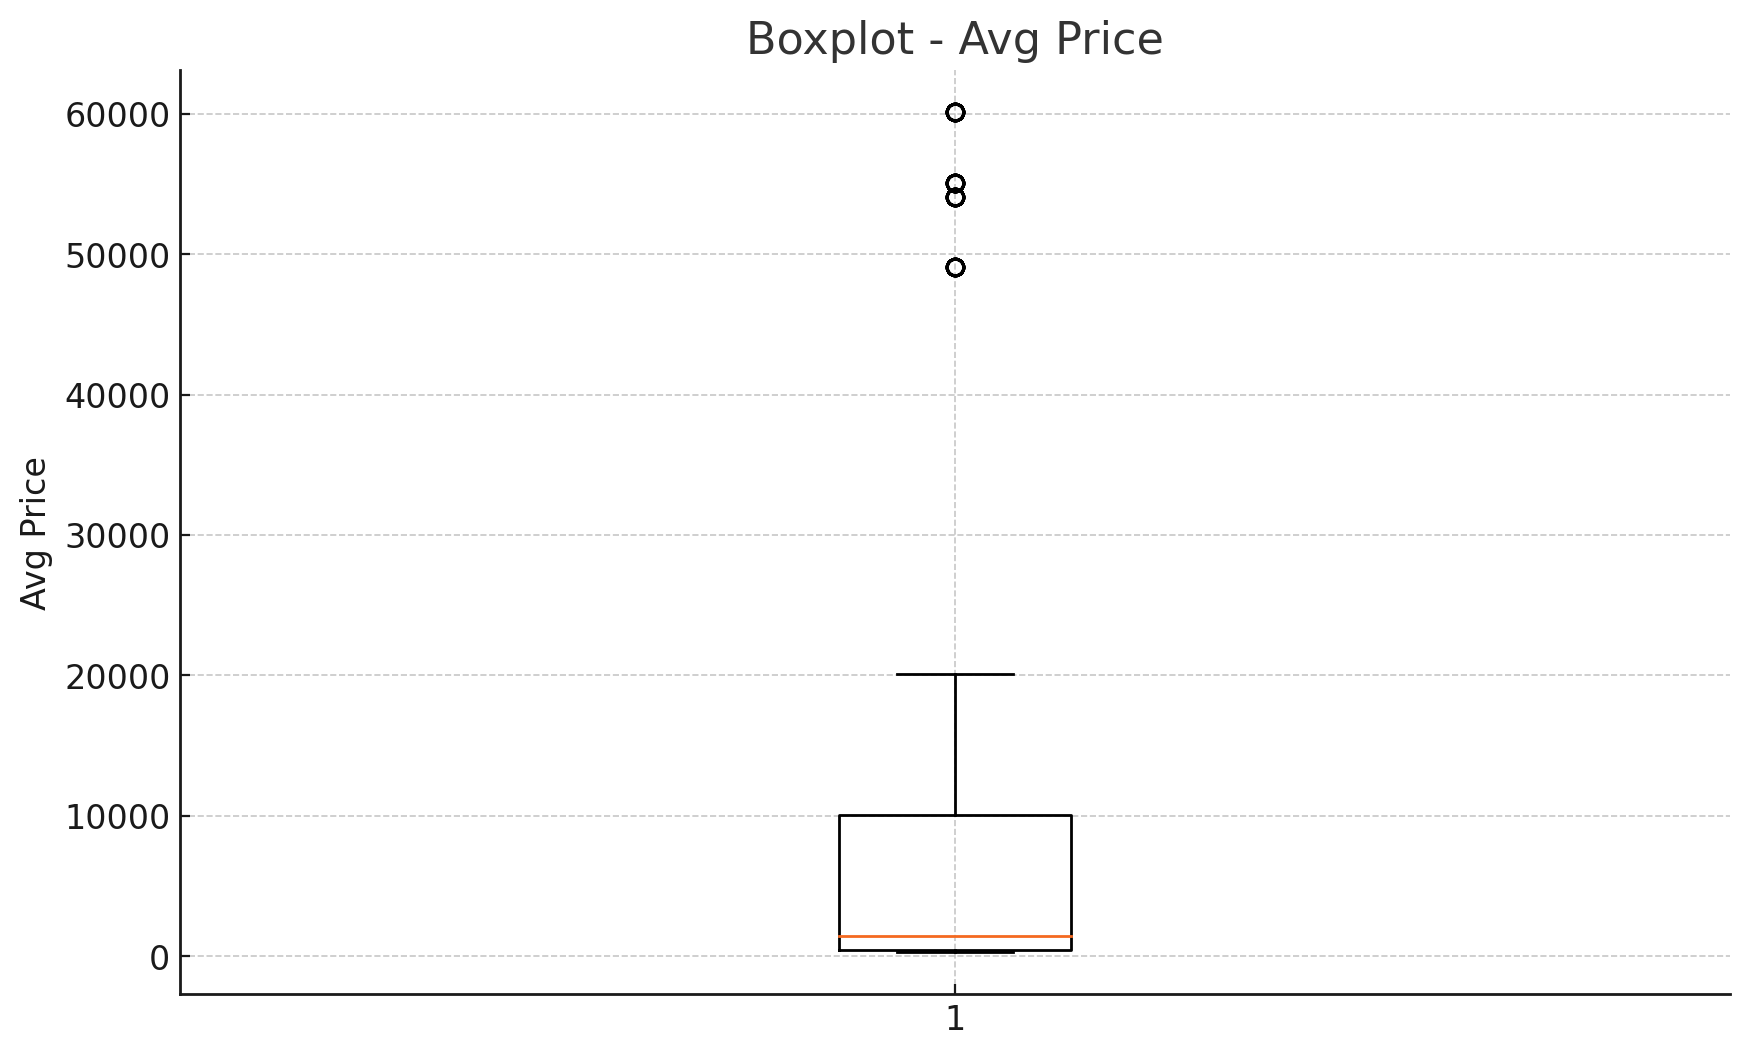

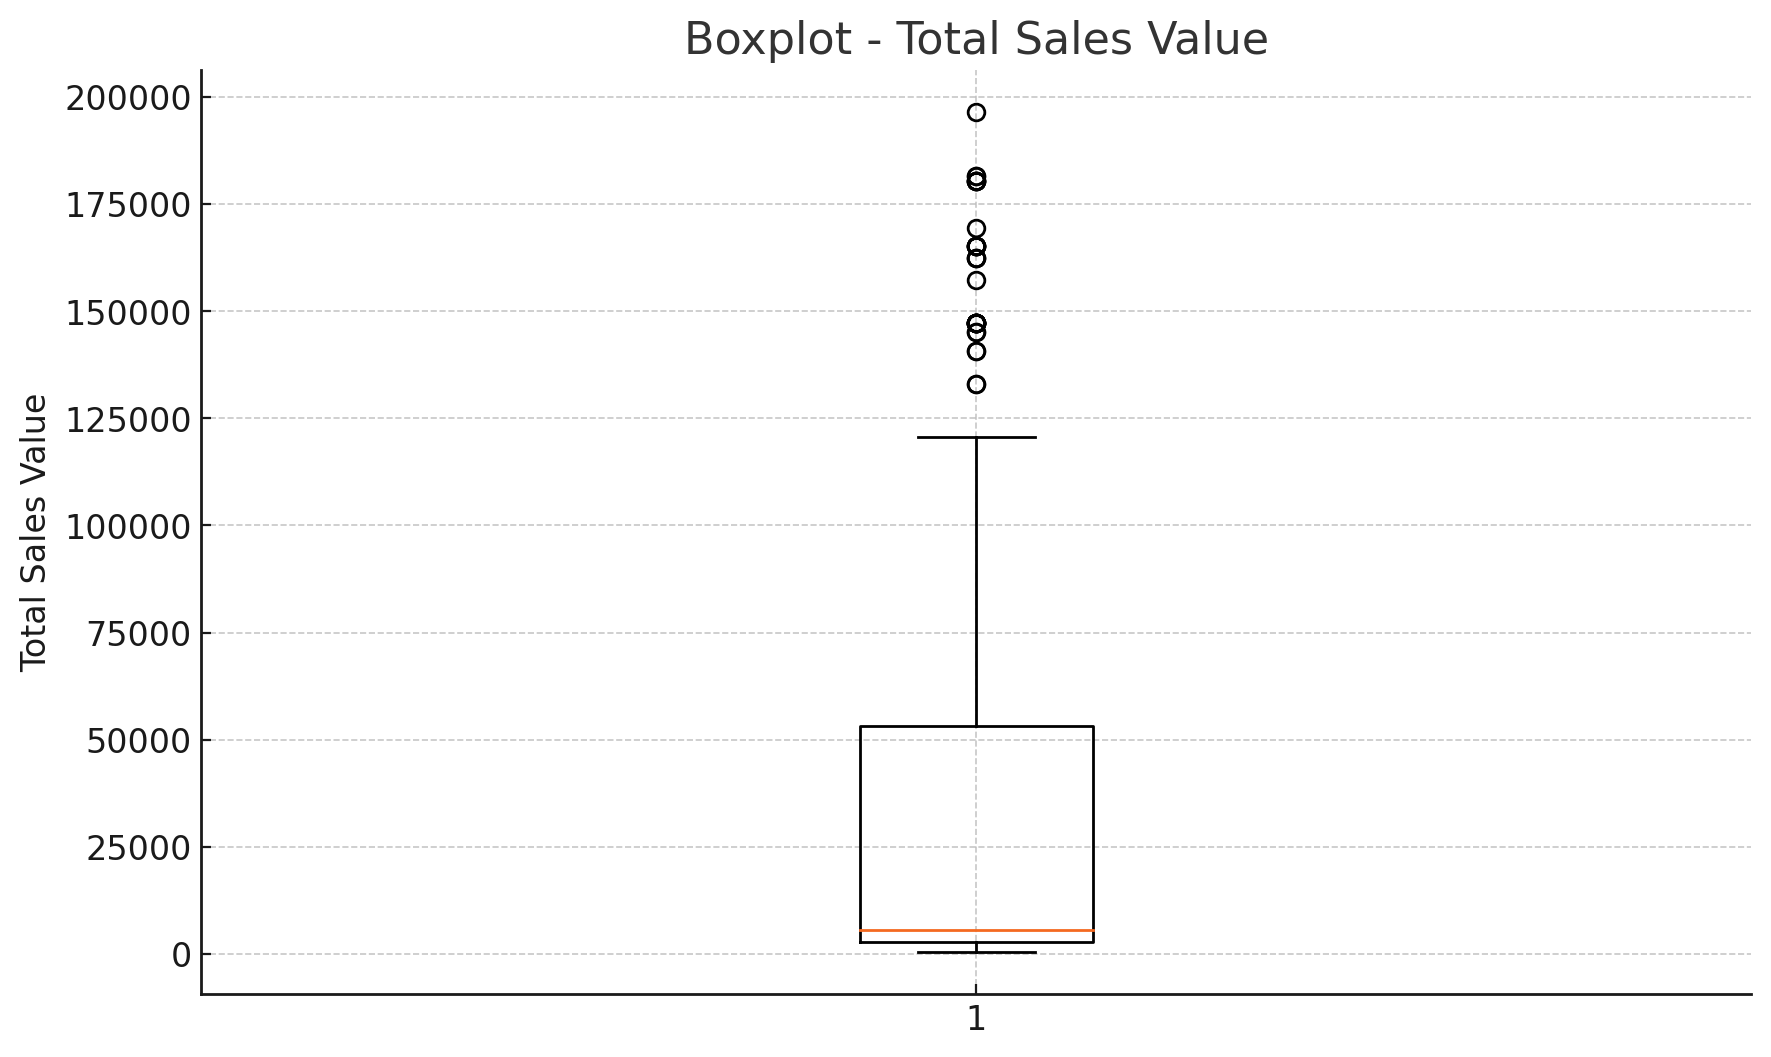

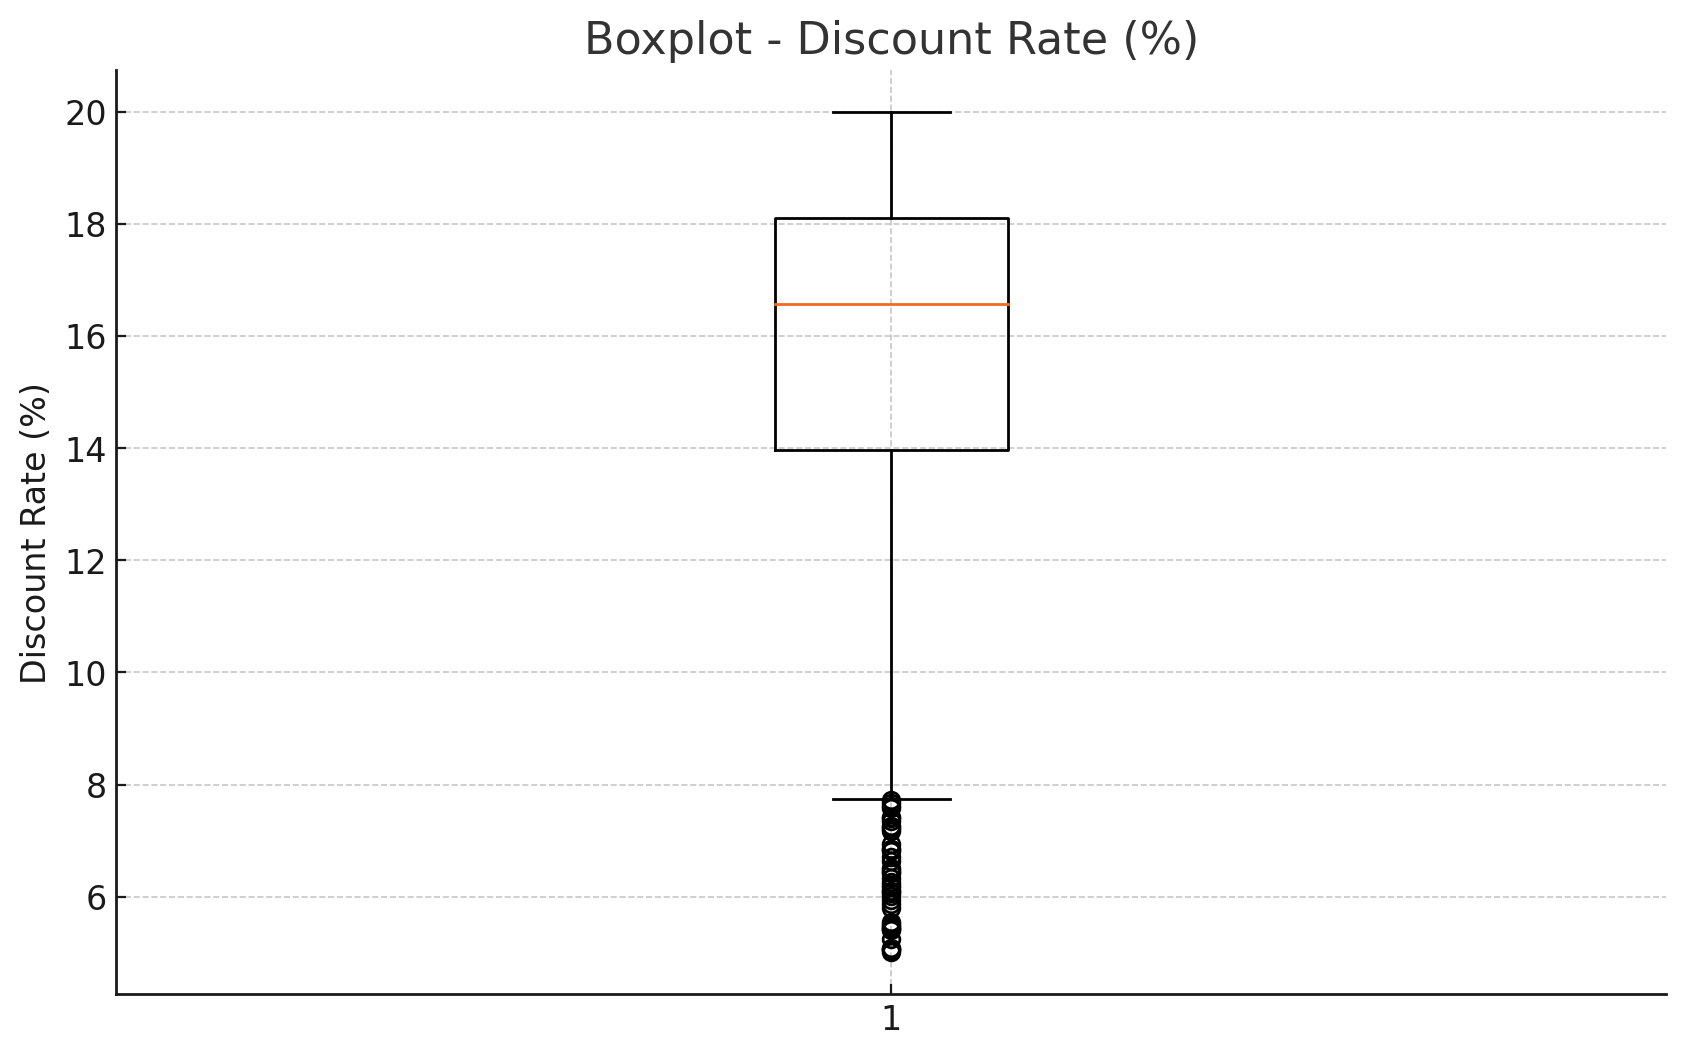

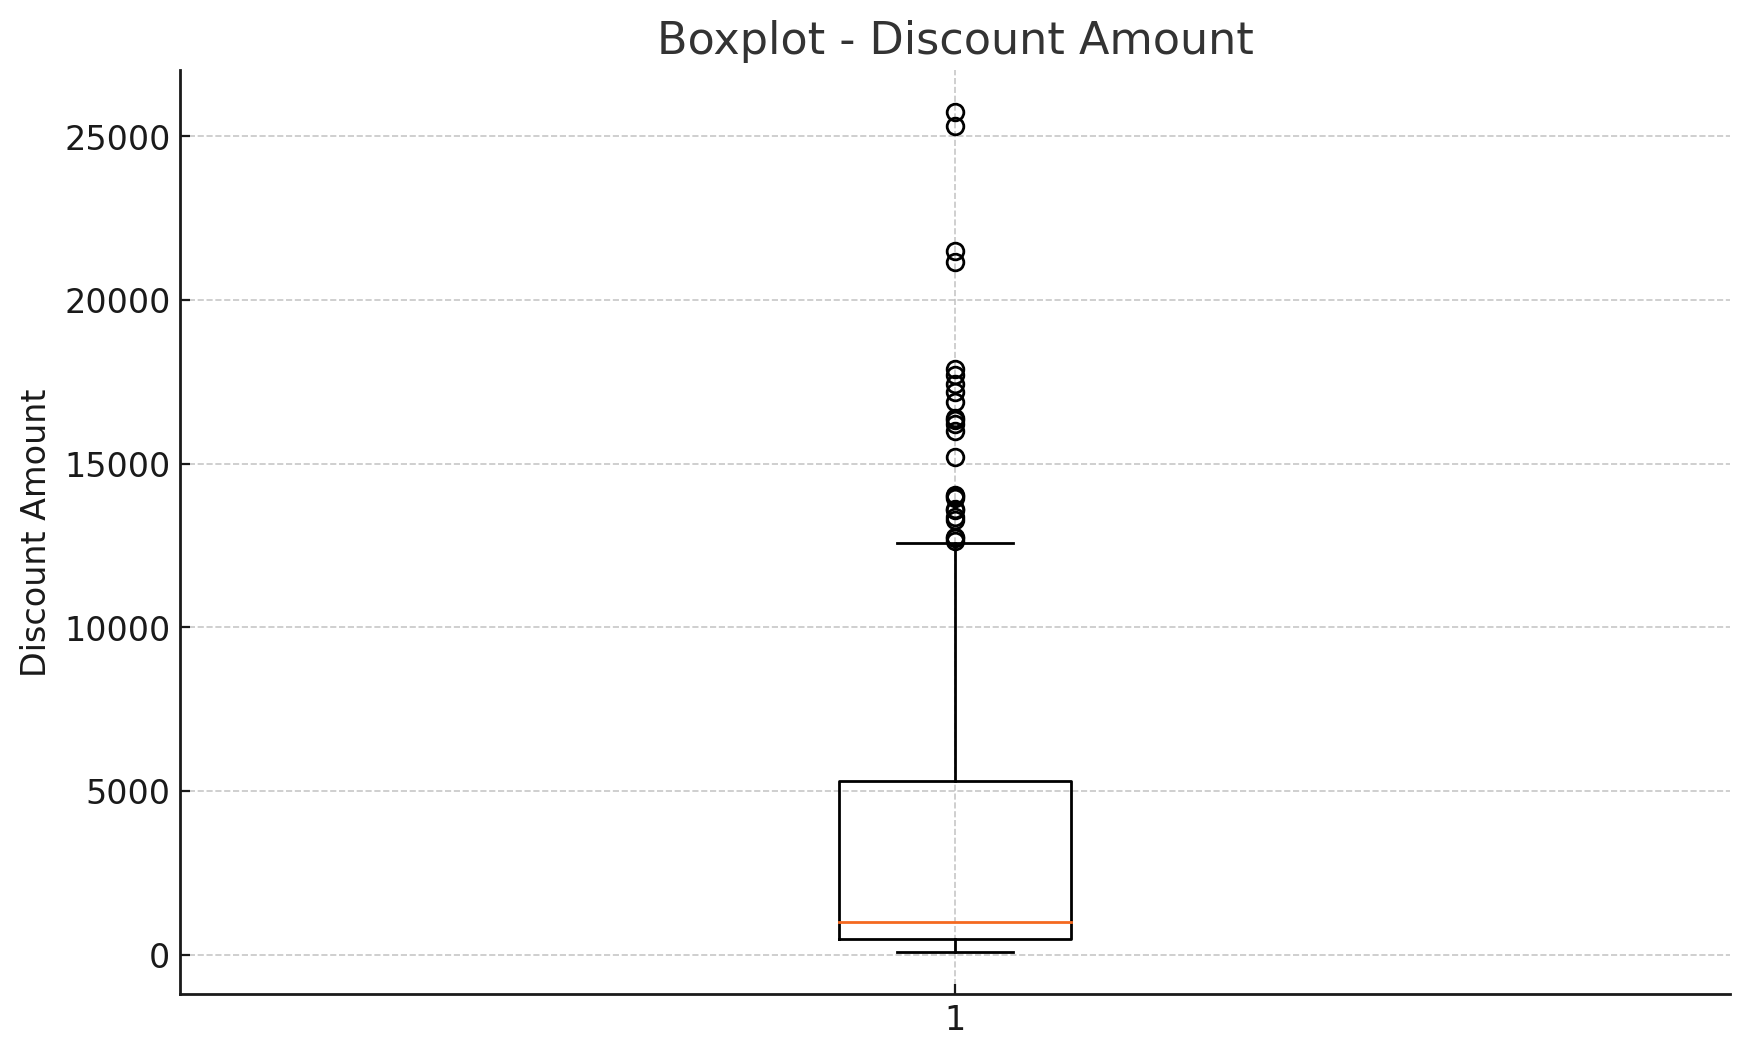

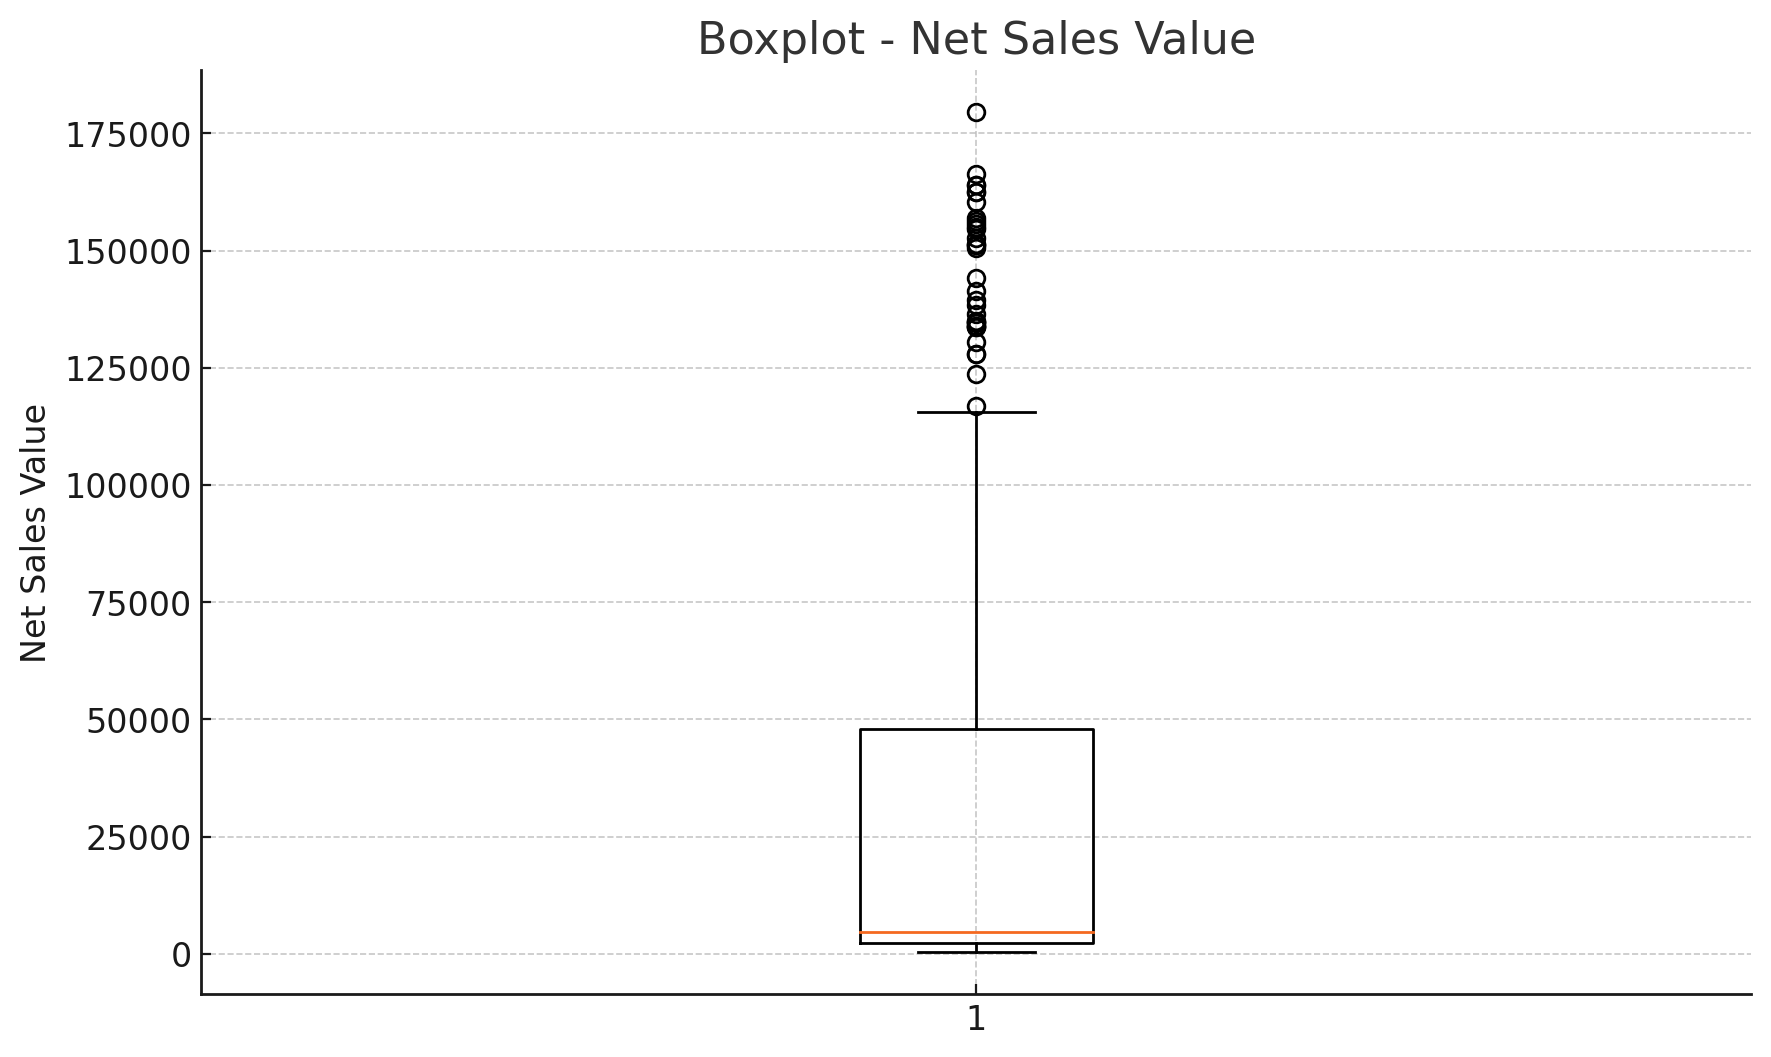

In [6]:
# BOXPLOTS (one plot per column)
for c in num_cols:
    plt.figure()
    plt.boxplot(df[c].dropna(), vert=True)
    plt.title(f"Boxplot - {c}")
    plt.ylabel(c)
    plt.show()

## 6. Bar Charts for Categorical Columns

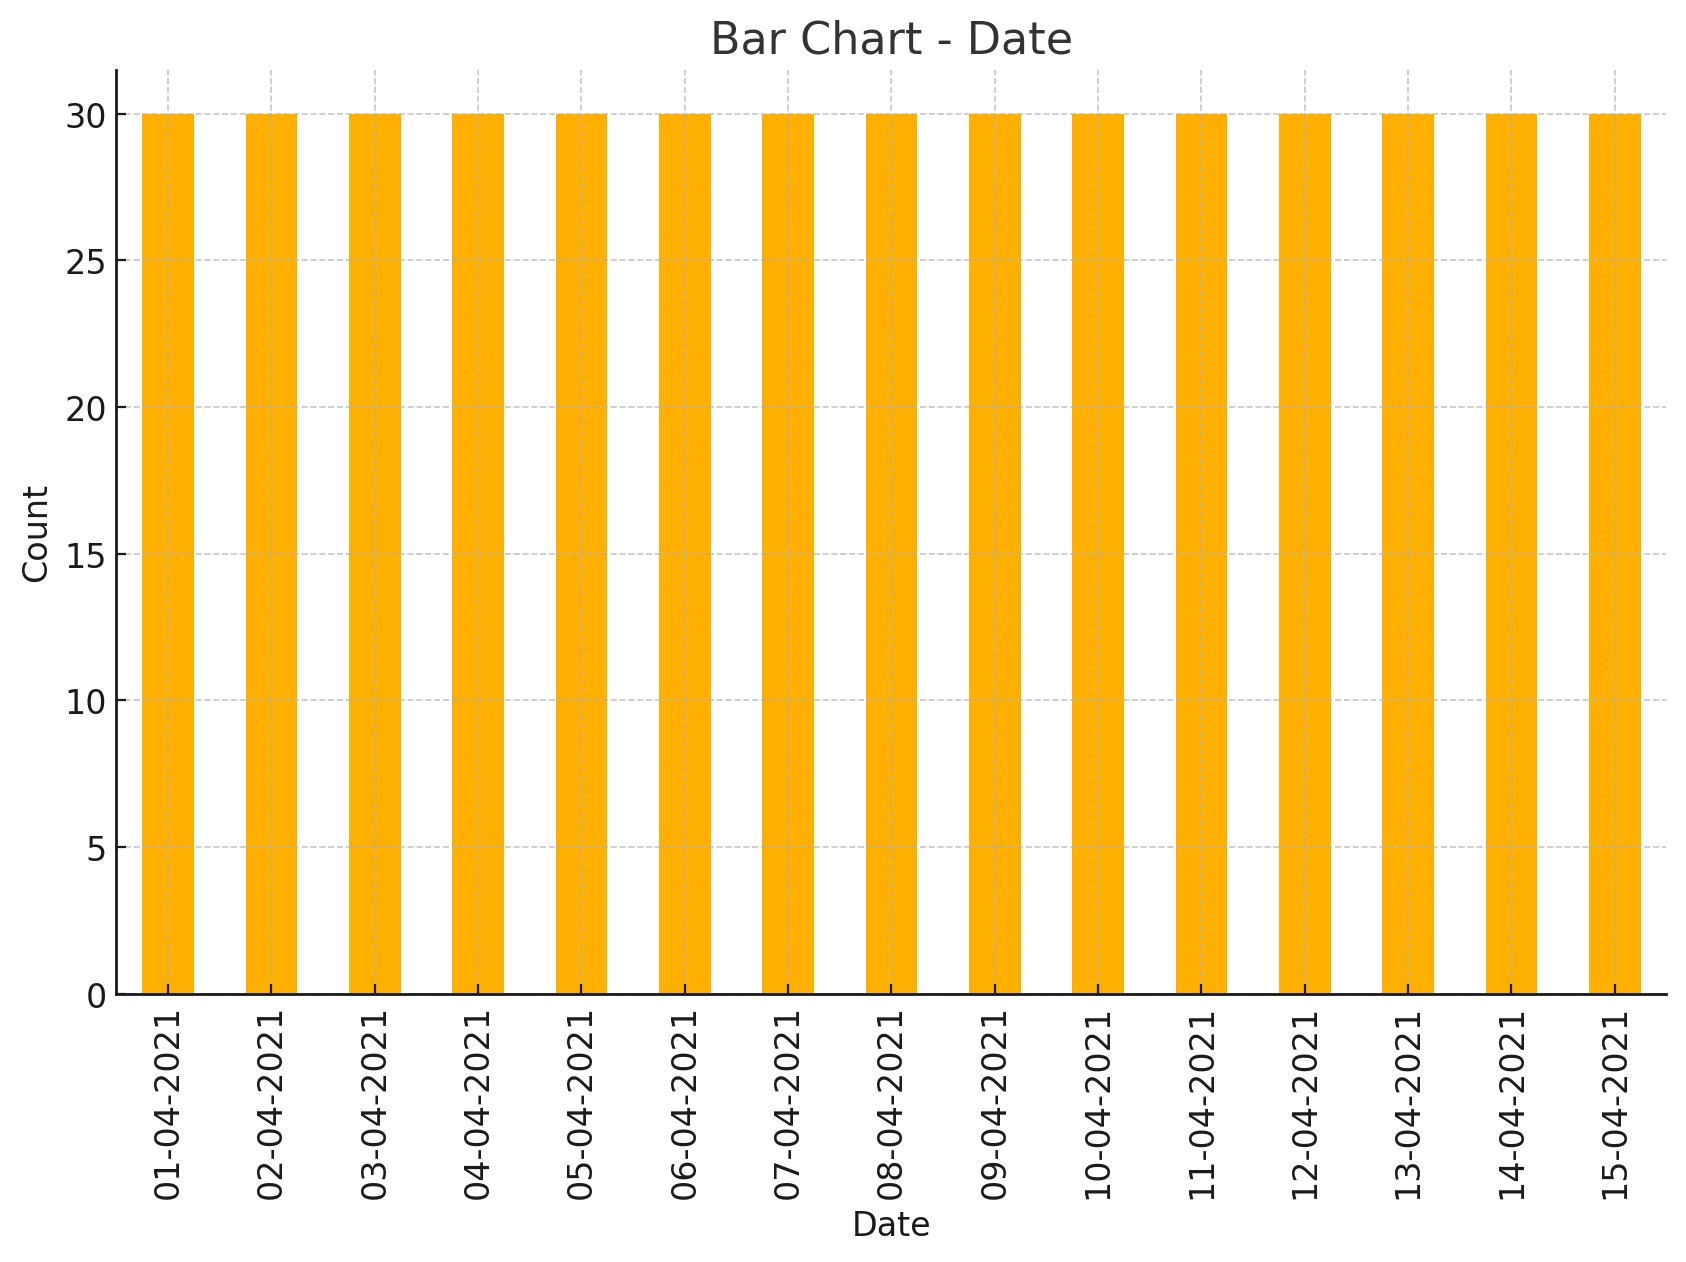

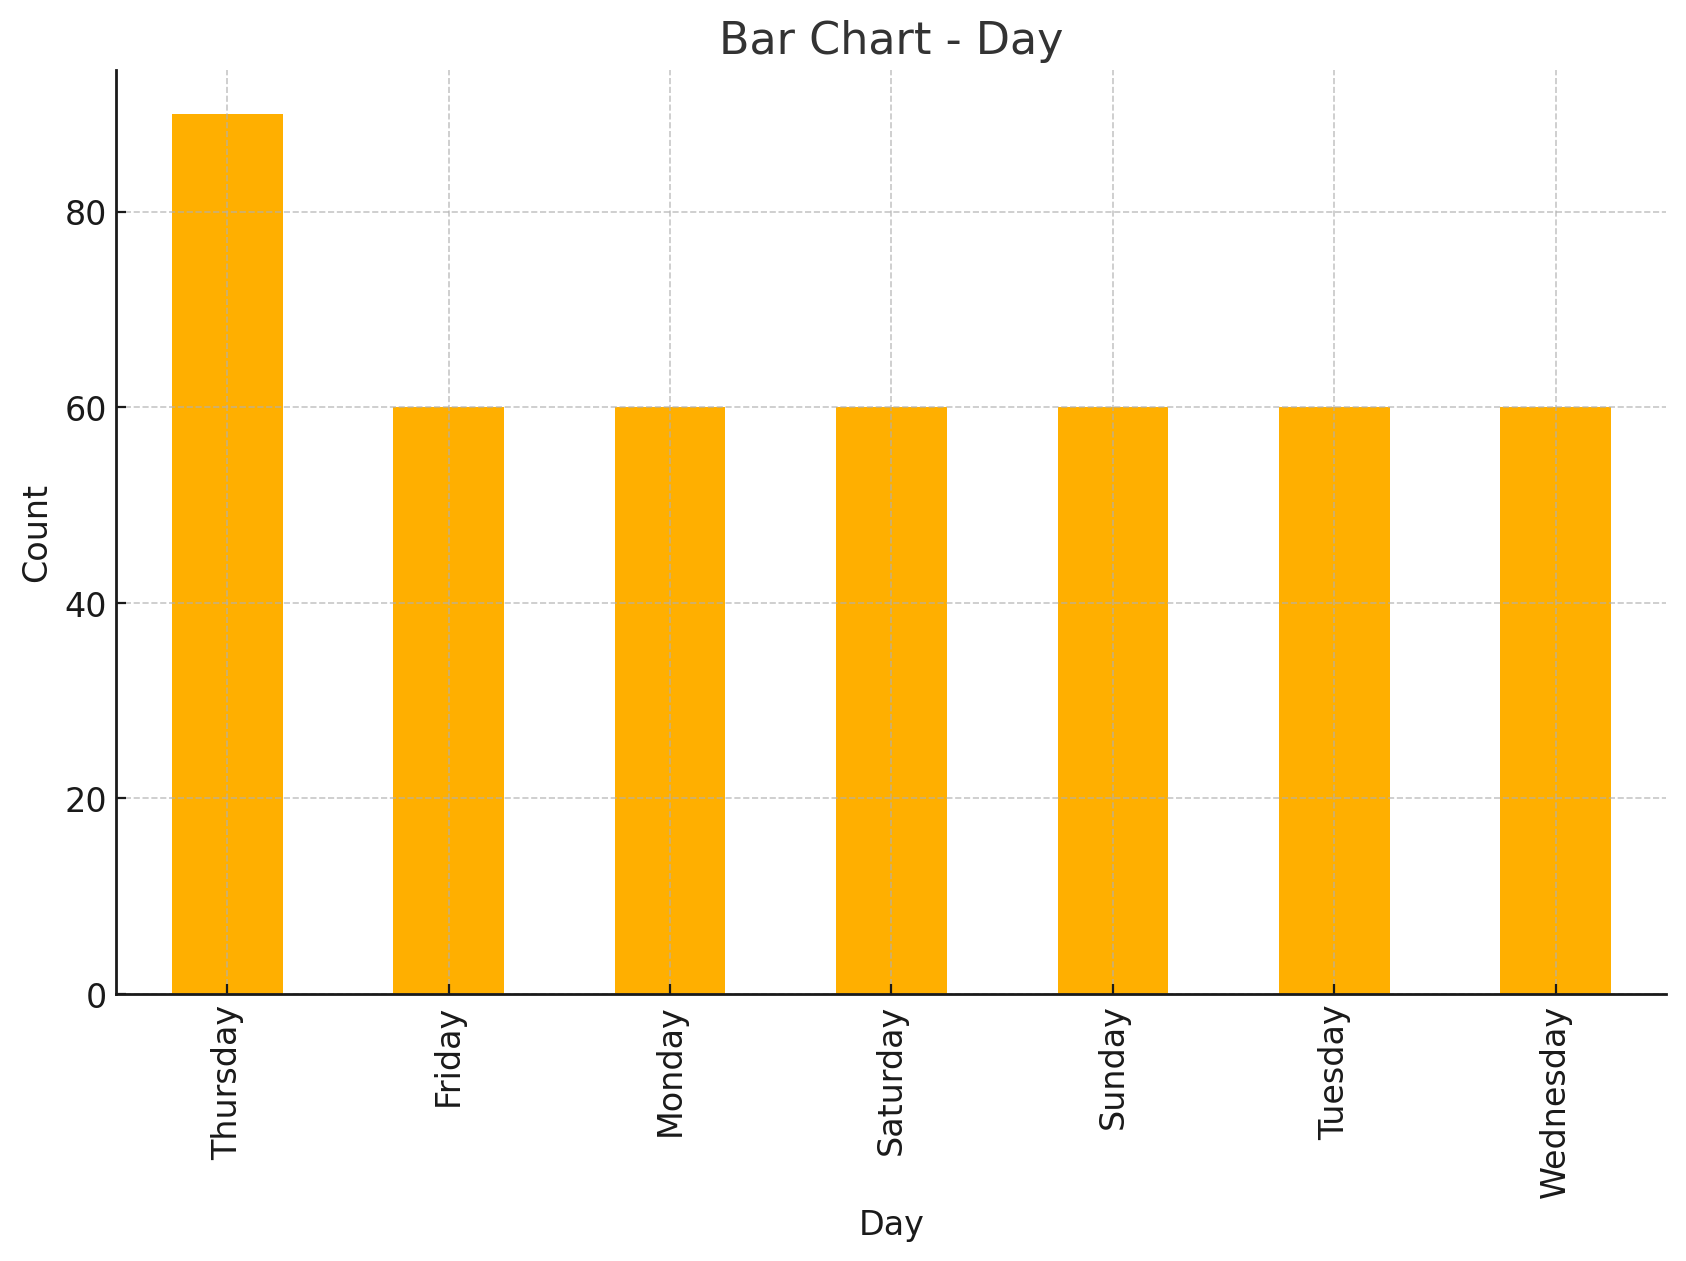

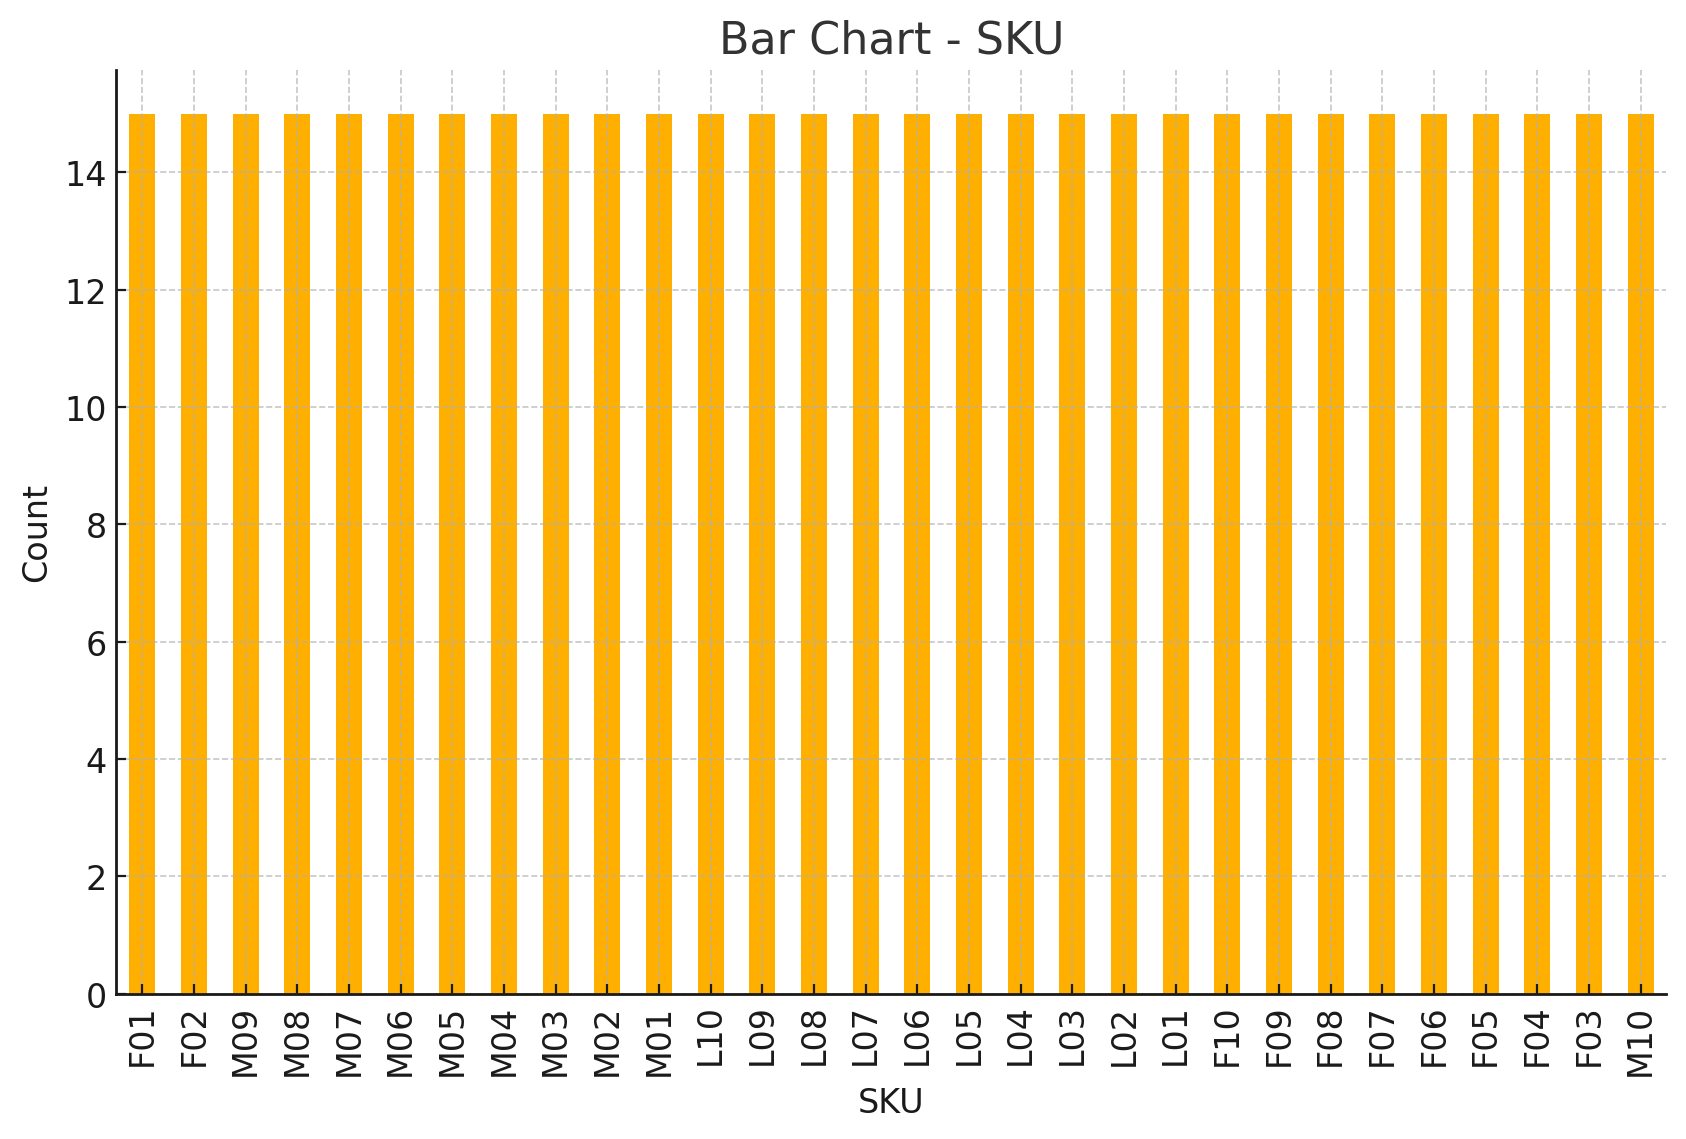

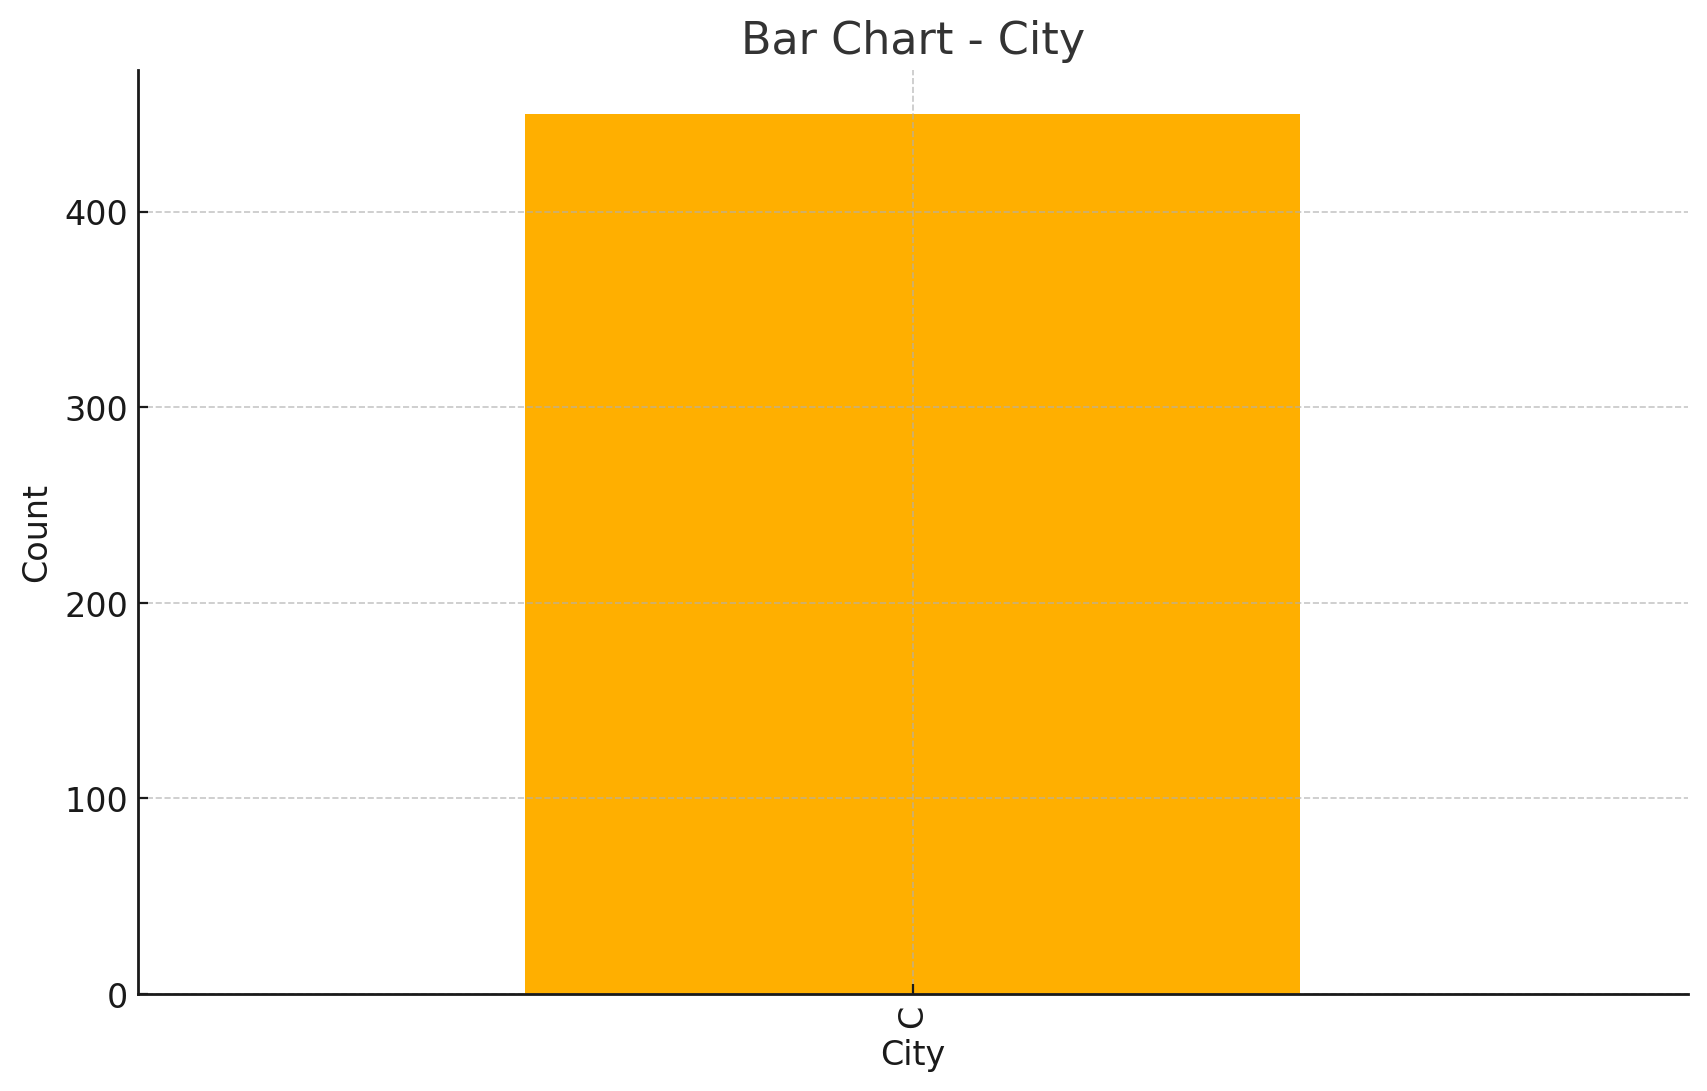

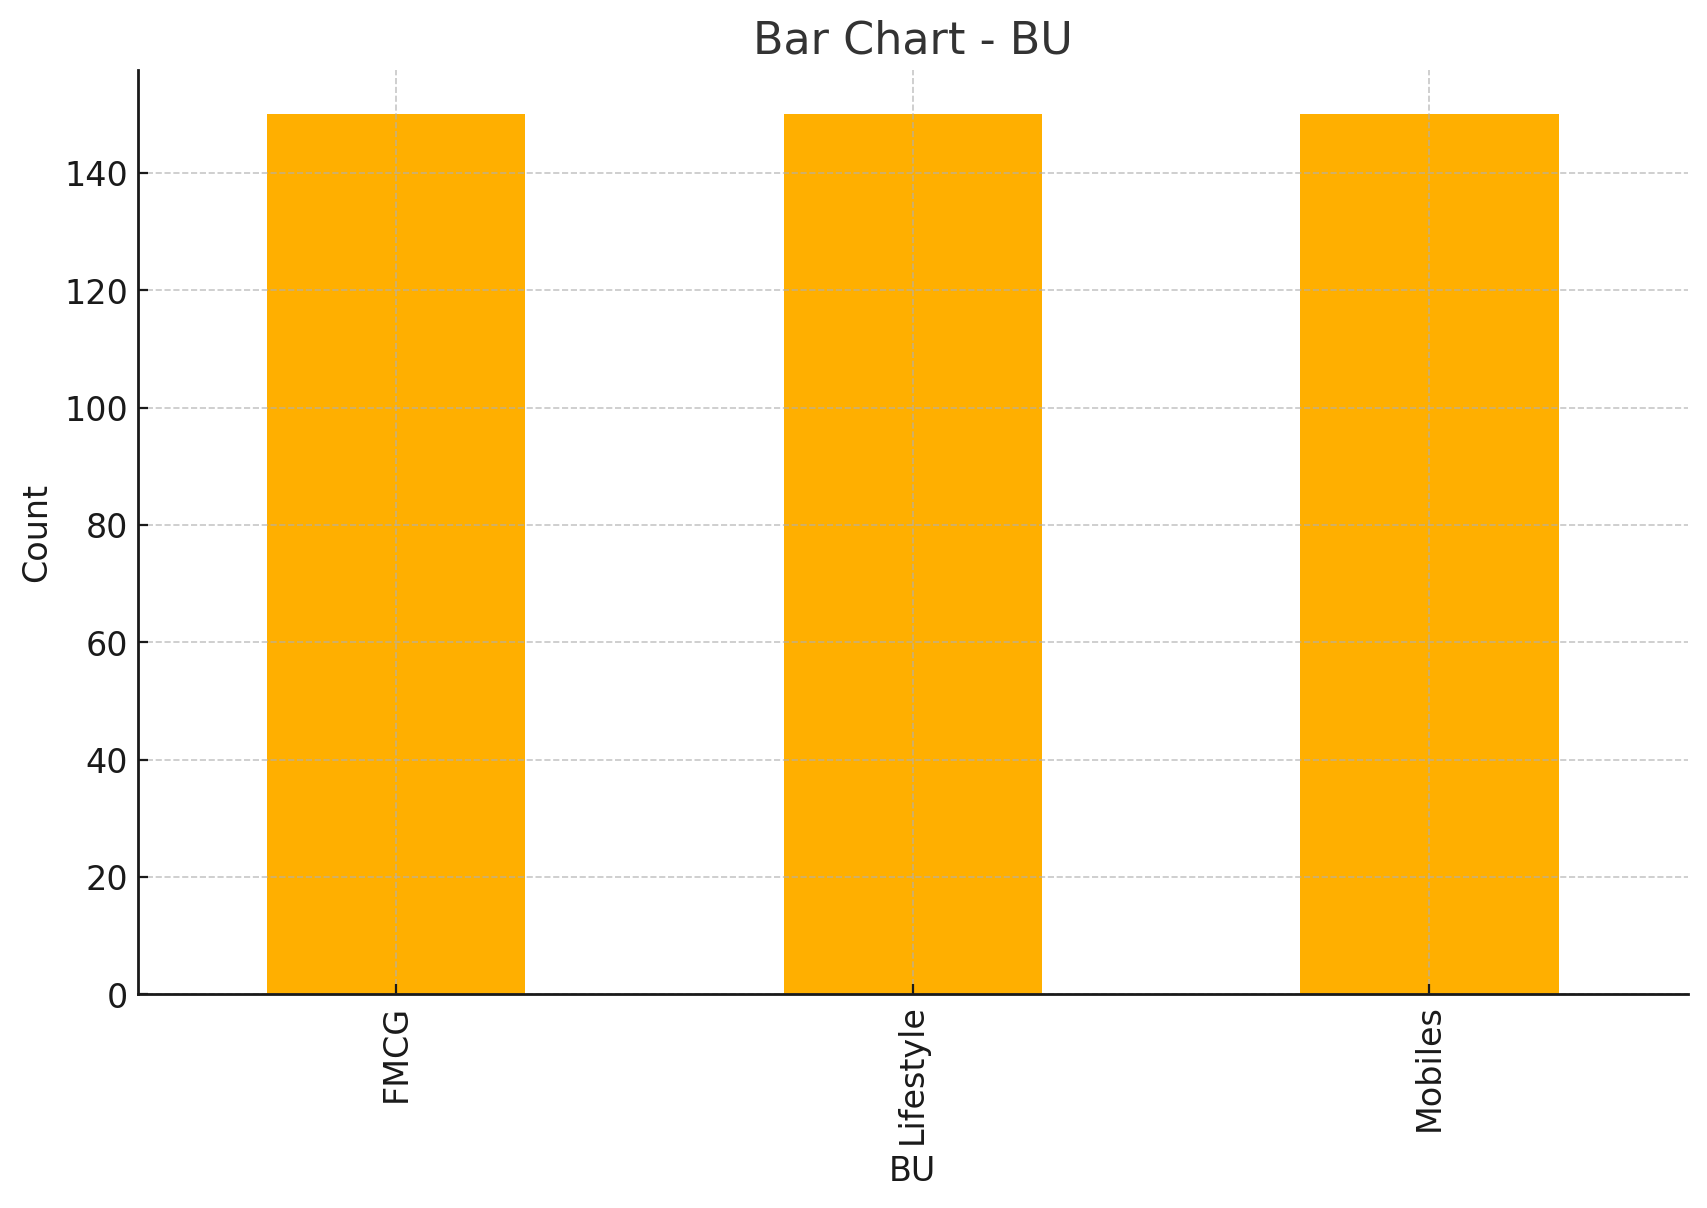

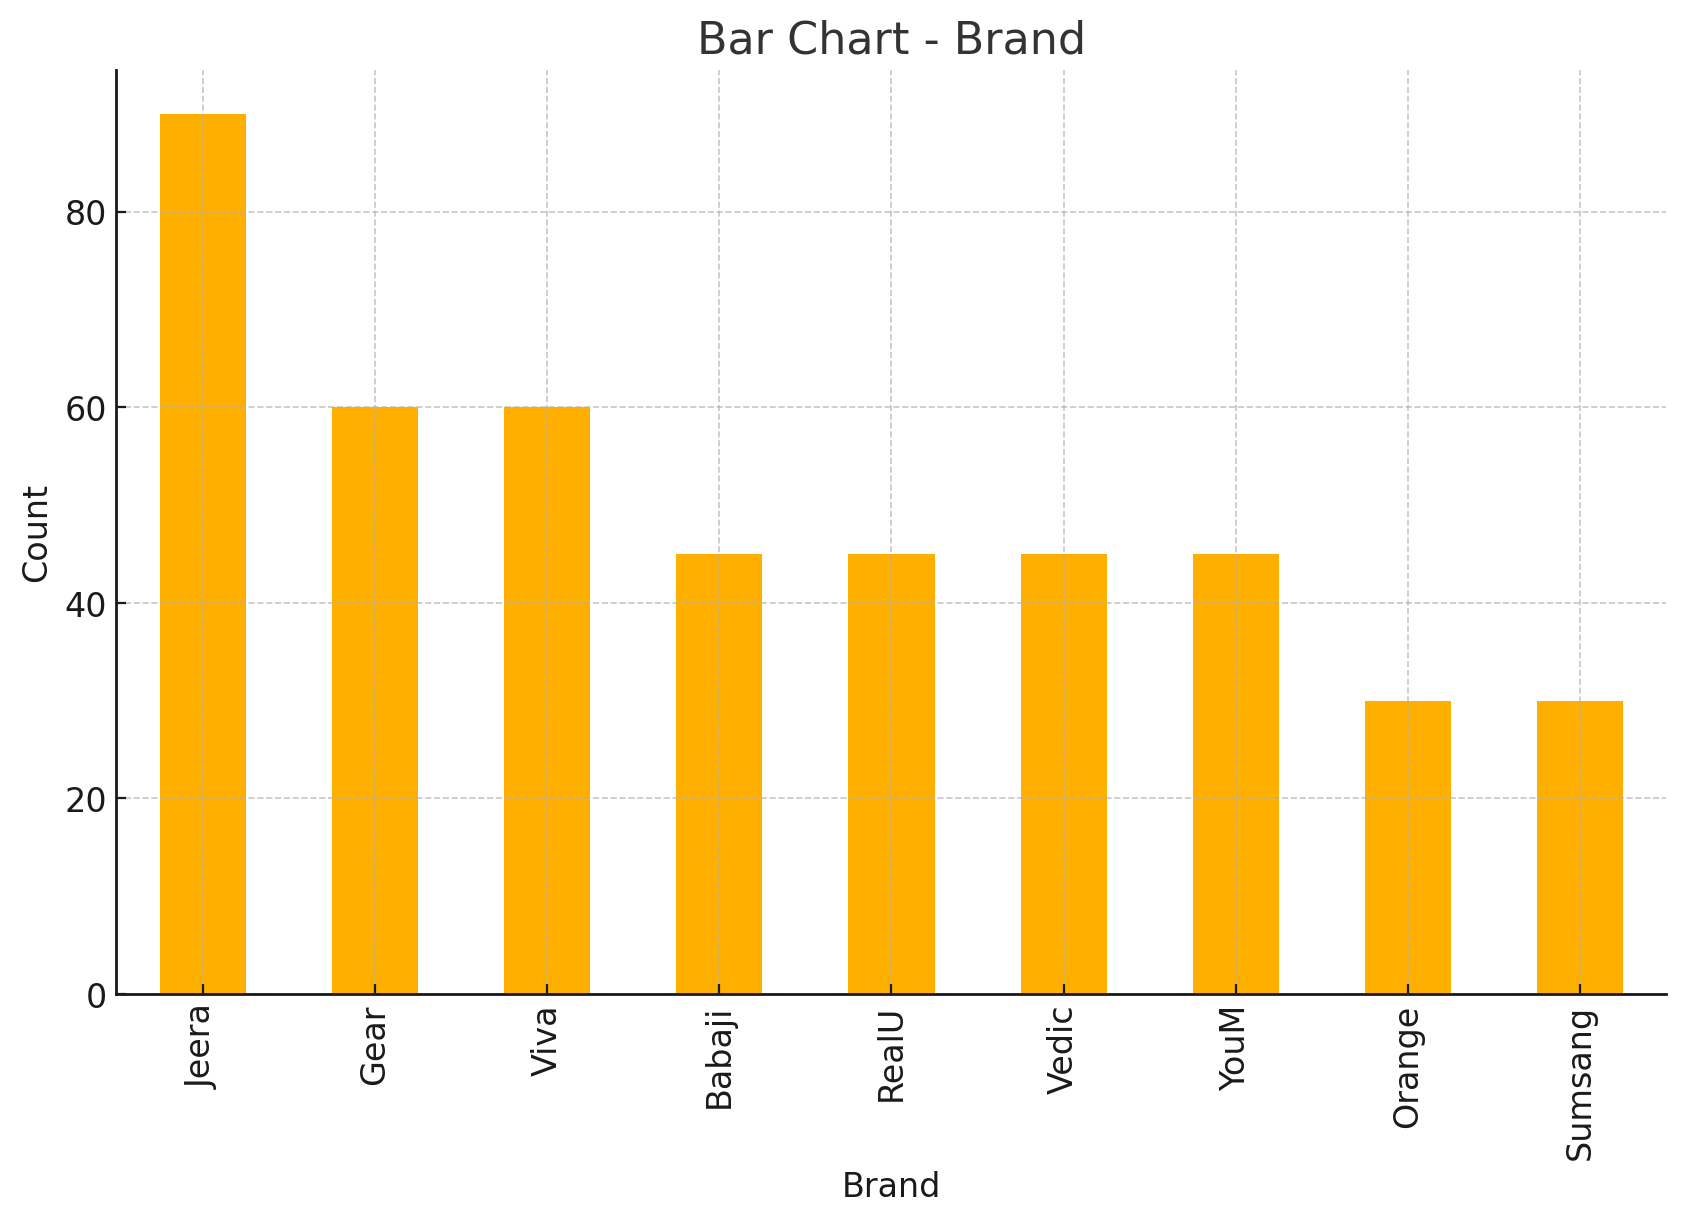

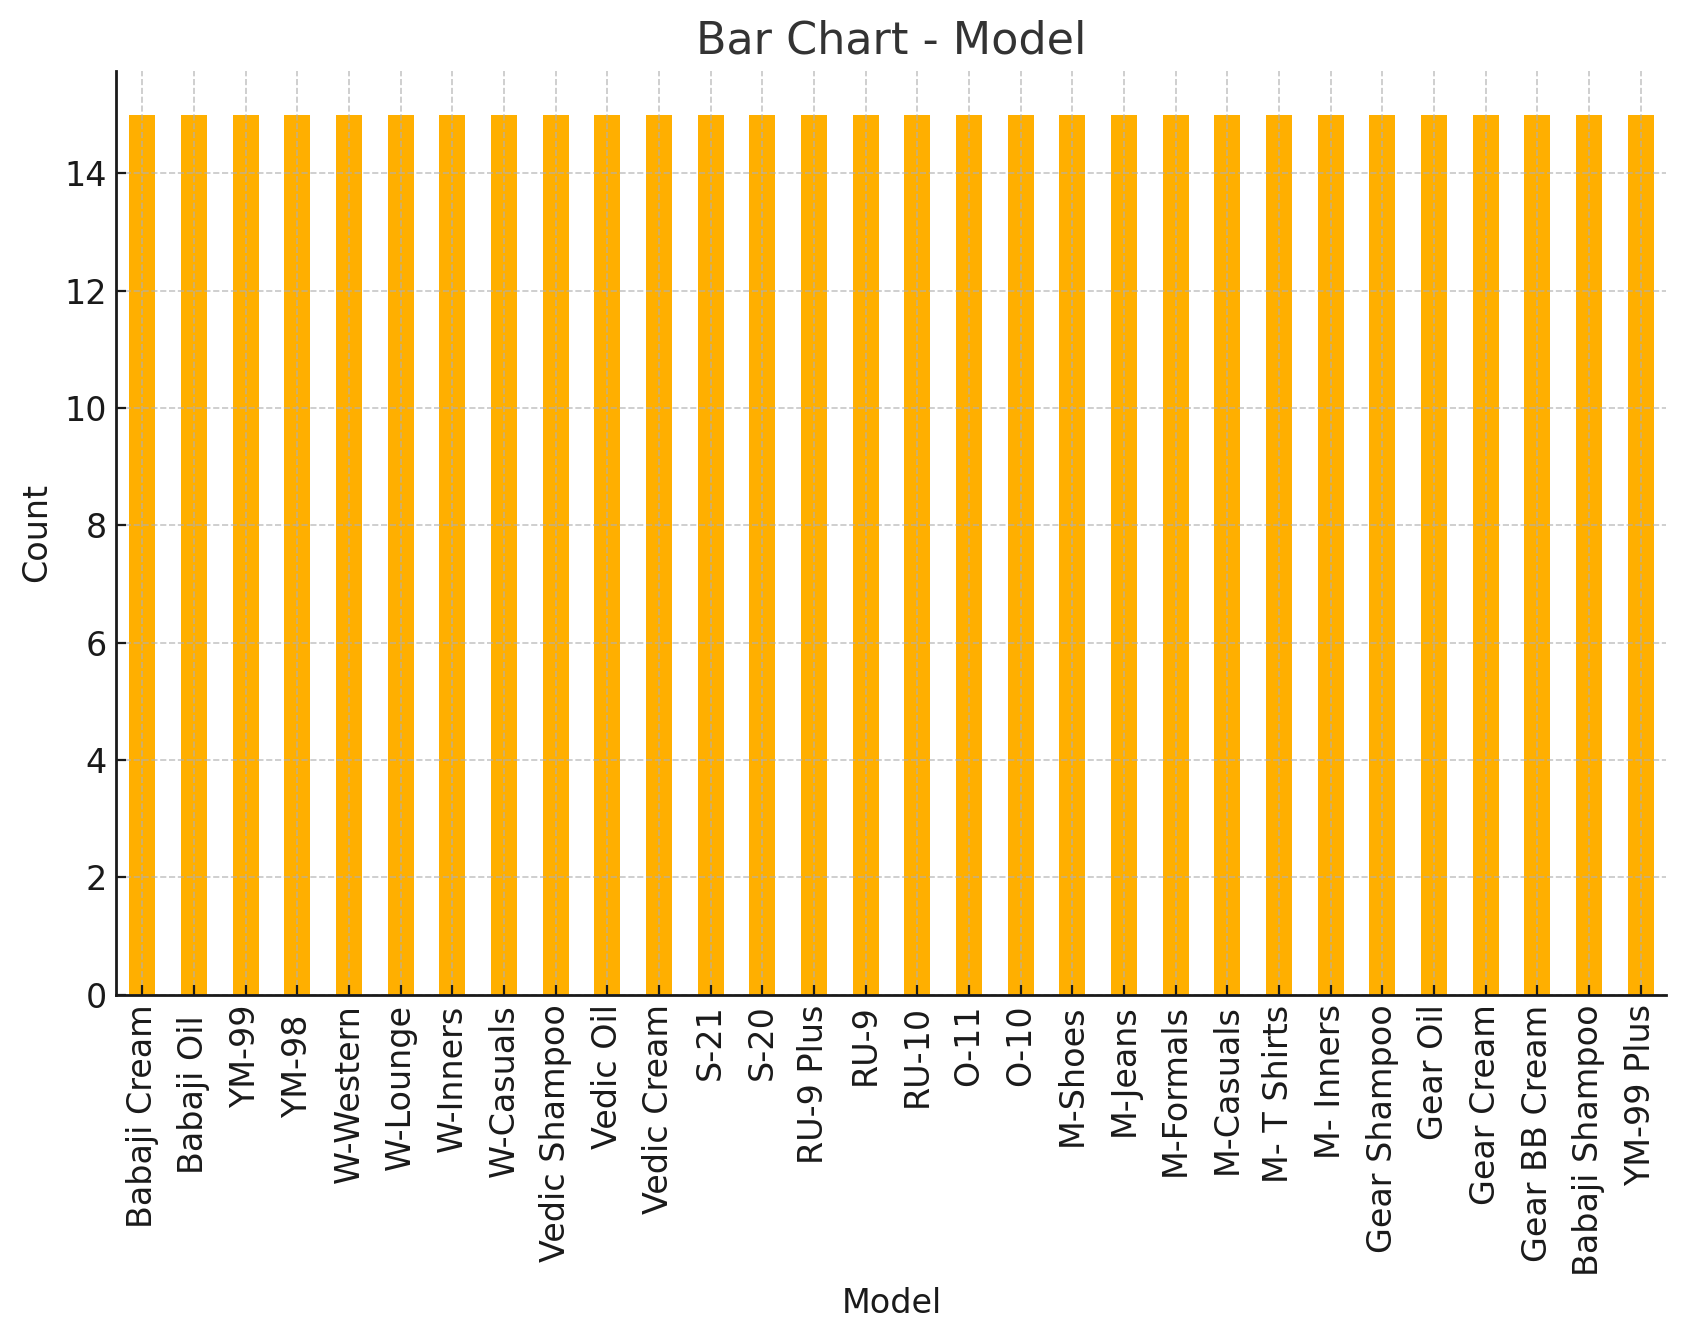

In [7]:
# BAR CHARTS FOR CATEGORICAL VARIABLES
for c in cat_cols:
    counts = df[c].astype('category').value_counts(dropna=False)
    plt.figure()
    counts.plot(kind='bar')
    plt.title(f"Bar Chart - {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()

## 7. Brief Interpretations
- **Means/medians** indicate central tendency; compare to **skewness** to infer tail direction.
- **Large std** suggests high variability; check **boxplots** for outliers.
- **Histograms** show distribution shape (normal/skewed/multimodal).
- **Boxplots** highlight IQR and extreme values (points beyond whiskers).
- **Bar charts** summarize frequency of categories; look for dominant classes or imbalance.
